# Step 1: Importing Libraries

In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Step 2: Loading and Exploring the Dataset

In [142]:
# Load dataset
data = pd.read_csv('credit_card_dataset.csv')  # Replace with the correct file path

# Display first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display statistical summary
print("\nStatistical Summary:")
print(data.describe())

First few rows of the dataset:
    Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5008865      F         Y             Y         2       135000.0   
2  5008889      F         N             Y         0       247500.0   
3  5009000      M         Y             Y         0       157500.0   
4  5009023      F         N             Y         2       216000.0   

            Type_Income                      EDUCATION Marital_status  \
0             Pensioner               Higher education        Married   
1               Working  Secondary / secondary special        Married   
2  Commercial associate               Higher education      Separated   
3               Working  Secondary / secondary special        Married   
4         State servant               Higher education        Married   

        Housing_type  Birthday_count  Employed_days Type_Occupation  \
0  House / apartment        -18772.0  

# Step 3: Handling Missing and Infinite Values

In [143]:
# Replace infinite values with NaN
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Show missing values before handling
print("\nMissing Values Before Handling (Count and Percentage):")
missing_before = data.isnull().sum().reset_index()
missing_before.columns = ['Column', 'Missing Count']
missing_before['Missing Percentage'] = (missing_before['Missing Count'] / len(data)) * 100
print(missing_before)

# Fill missing numerical values with mean
numerical_columns = data.select_dtypes(include=['number']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Fill missing categorical values with mode
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Show missing values after handling
print("\nMissing Values After Handling (Count and Percentage):")
missing_after = data.isnull().sum().reset_index()
missing_after.columns = ['Column', 'Missing Count']
missing_after['Missing Percentage'] = (missing_after['Missing Count'] / len(data)) * 100
print(missing_after)


Missing Values Before Handling (Count and Percentage):
             Column  Missing Count  Missing Percentage
0            Ind_ID              0            0.000000
1            GENDER              7            0.452196
2         Car_Owner              0            0.000000
3     Propert_Owner              0            0.000000
4          CHILDREN              0            0.000000
5     Annual_income             23            1.485788
6       Type_Income              0            0.000000
7         EDUCATION              0            0.000000
8    Marital_status              0            0.000000
9      Housing_type              0            0.000000
10   Birthday_count             22            1.421189
11    Employed_days              0            0.000000
12  Type_Occupation            488           31.524548
13   Family_Members              0            0.000000
14         Rejected              0            0.000000

Missing Values After Handling (Count and Percentage):
         

# Step 4: Outlier Detection with Boxplots

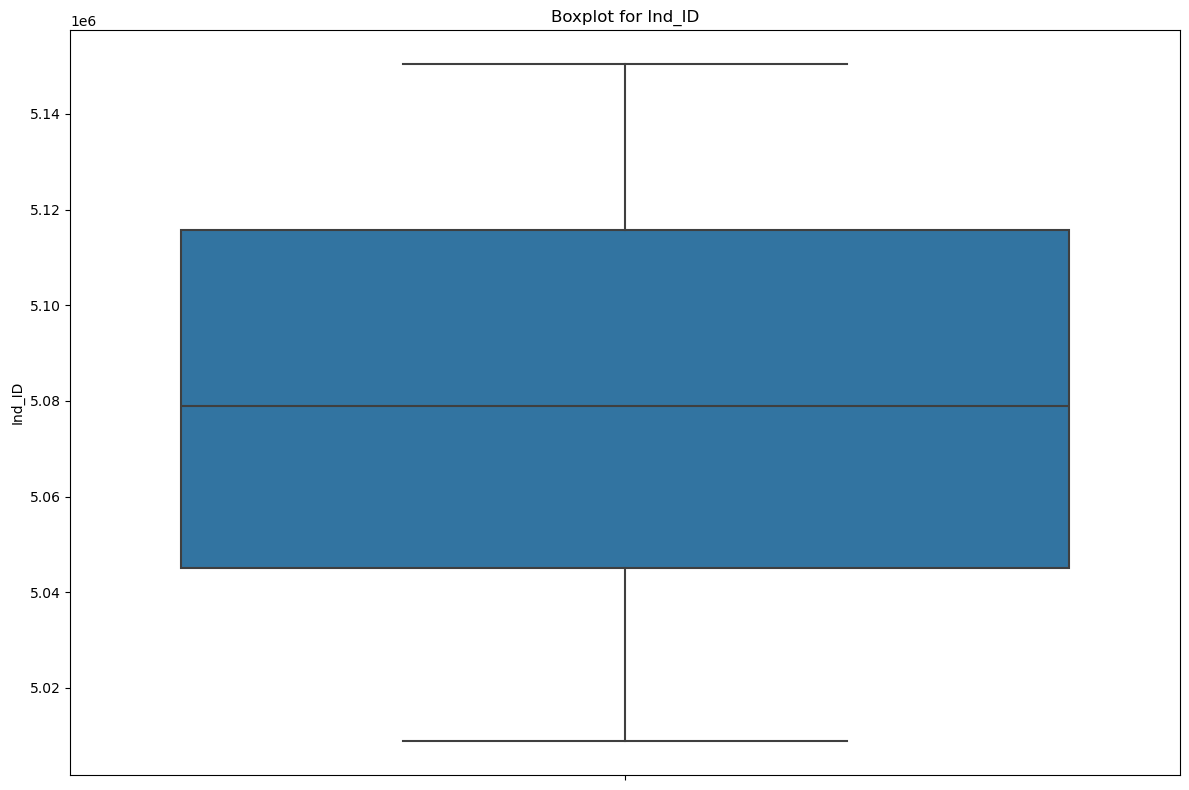

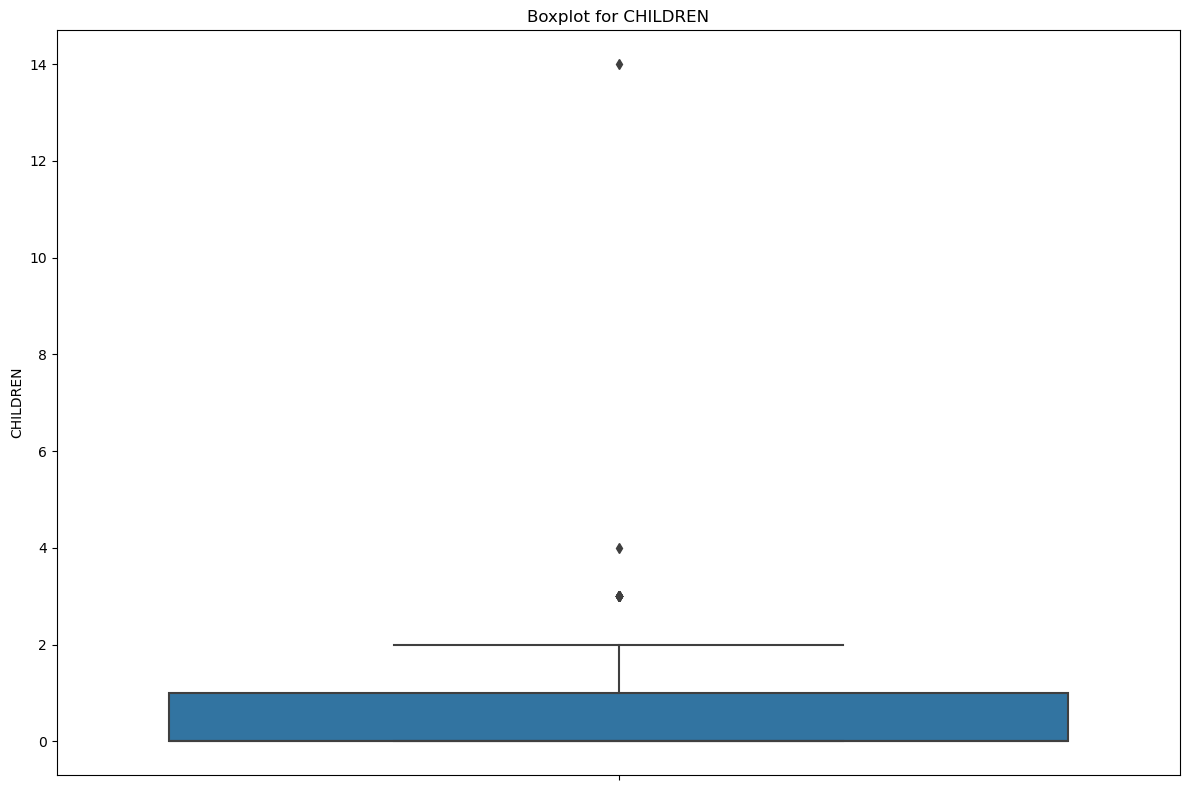

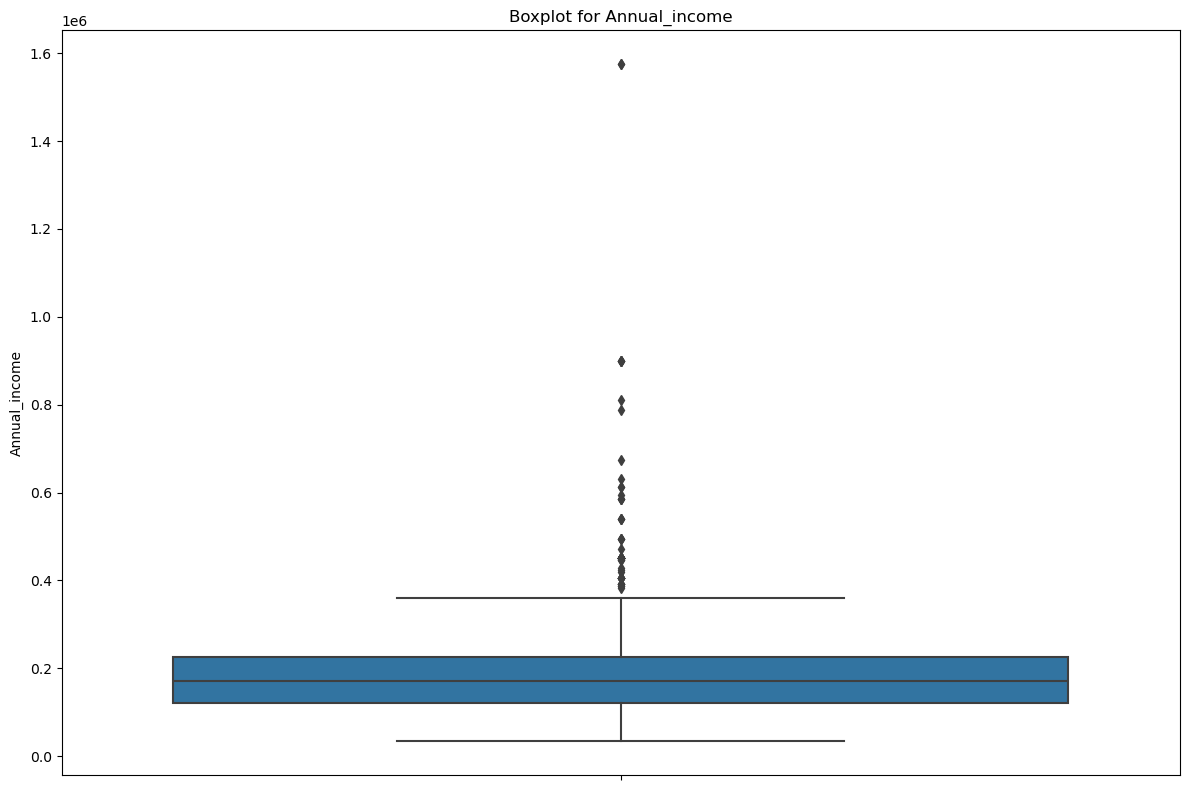

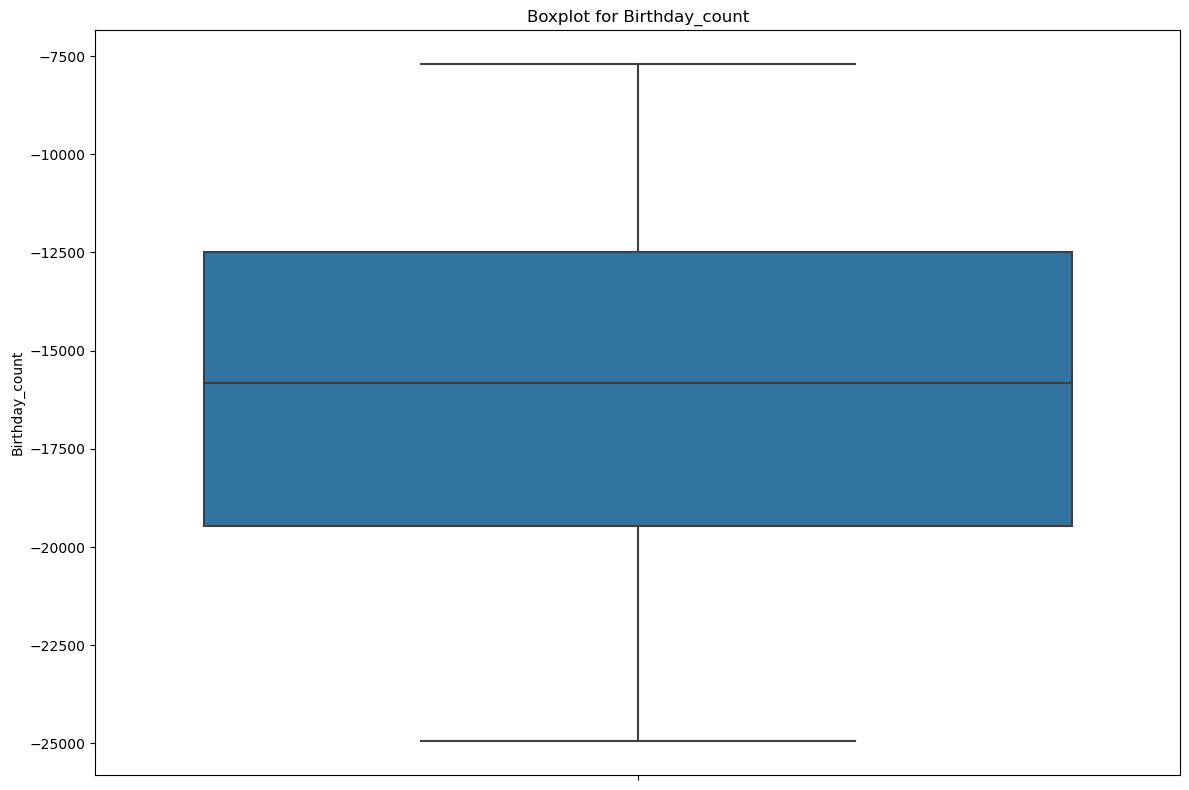

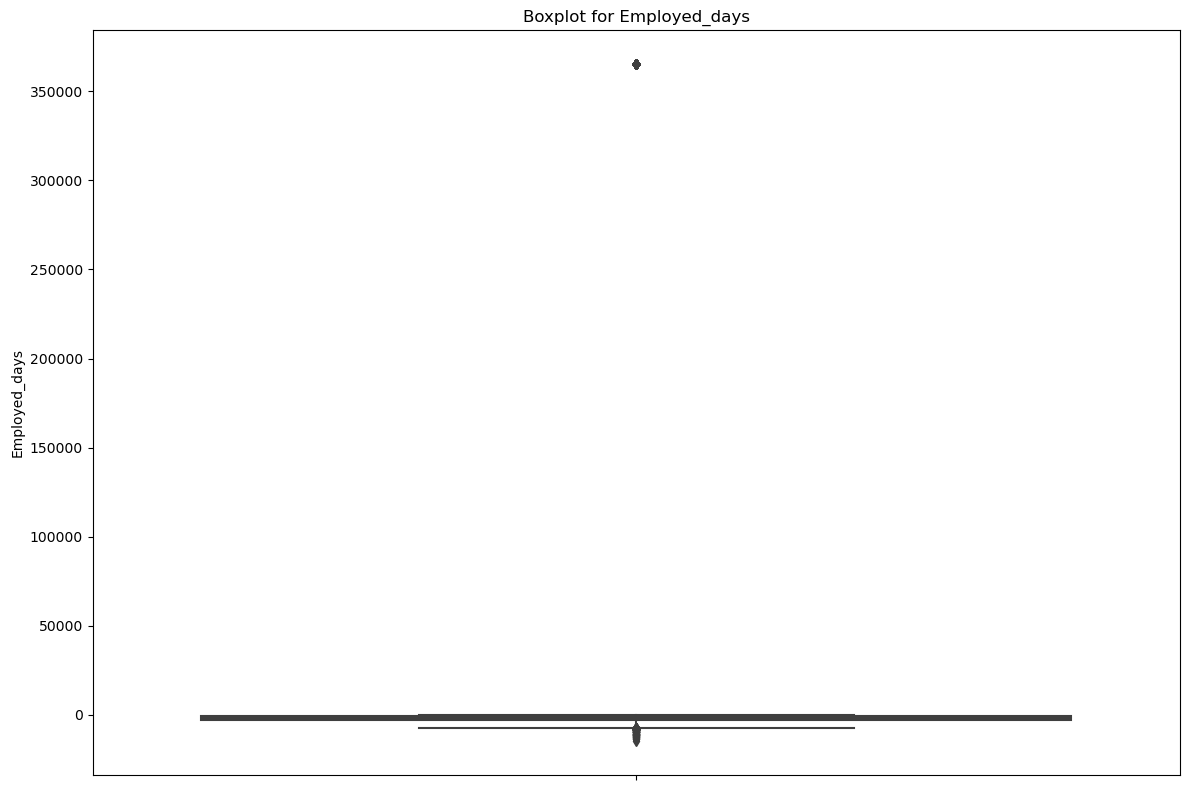

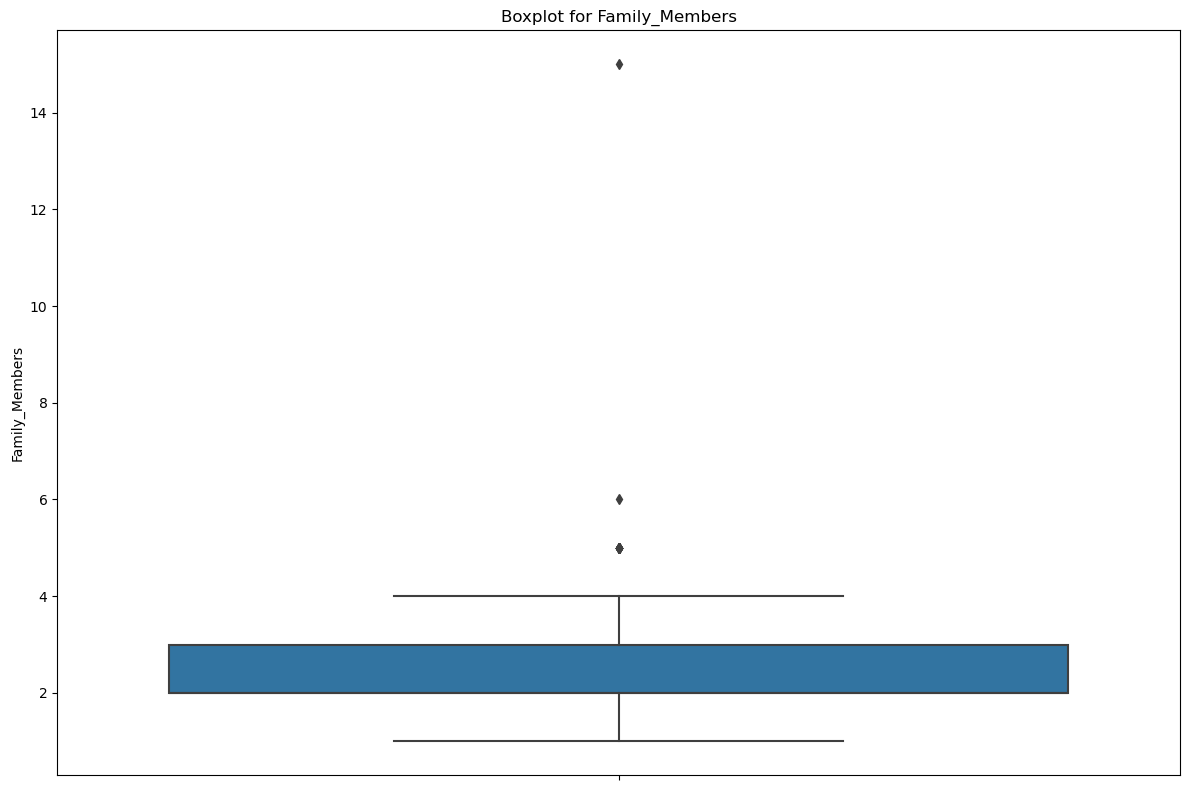

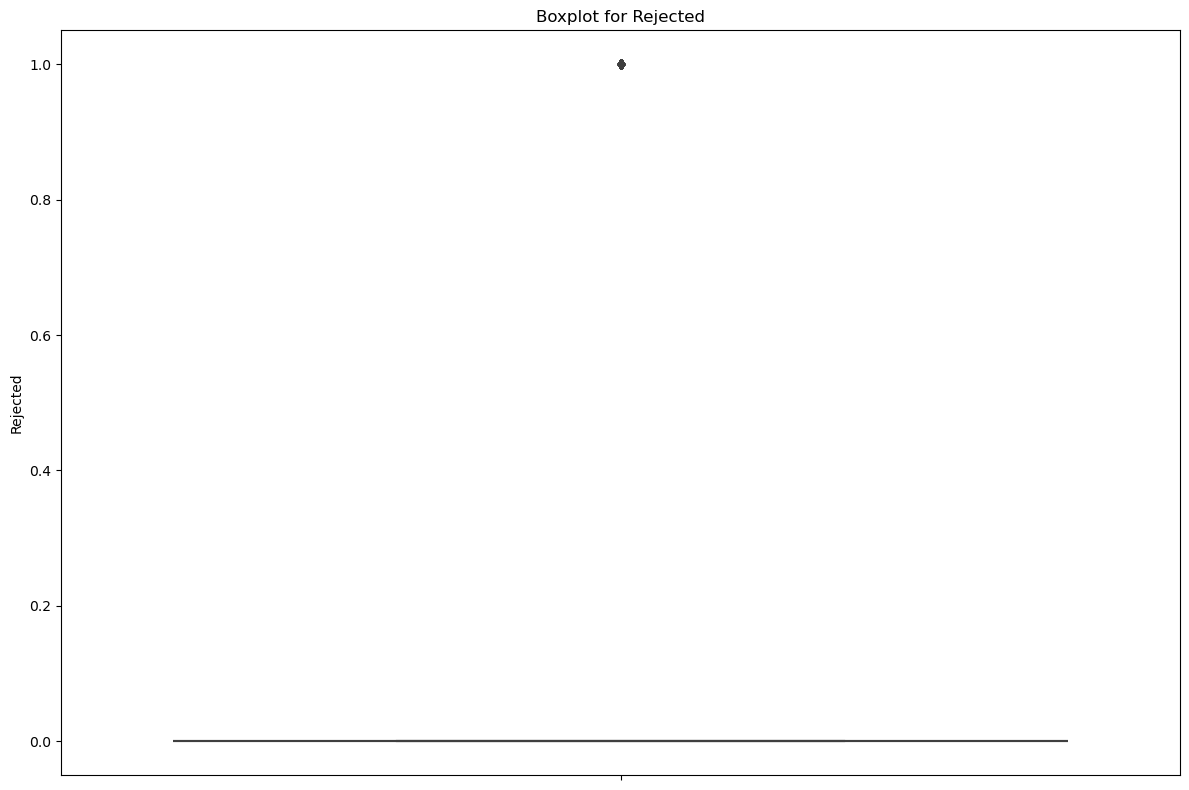

In [144]:
# Filter the numerical columns to include only those with valid numeric data types

valid_numerical_columns = [col for col in numerical_columns if pd.api.types.is_numeric_dtype(data[col])]

# Iterate over each valid numerical column to create a boxplot

for col in valid_numerical_columns:
    plt.figure(figsize=(12, 8))
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot for {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Step 5: Numerical Feature Distributions

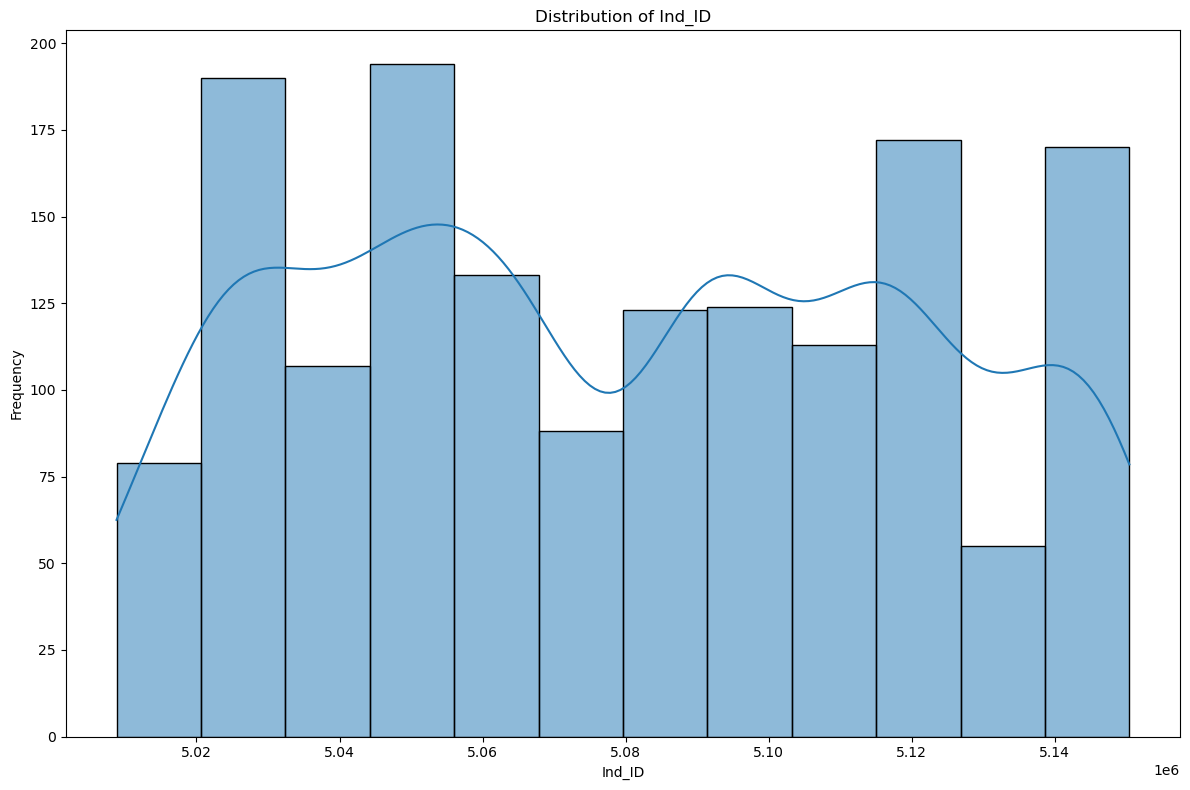

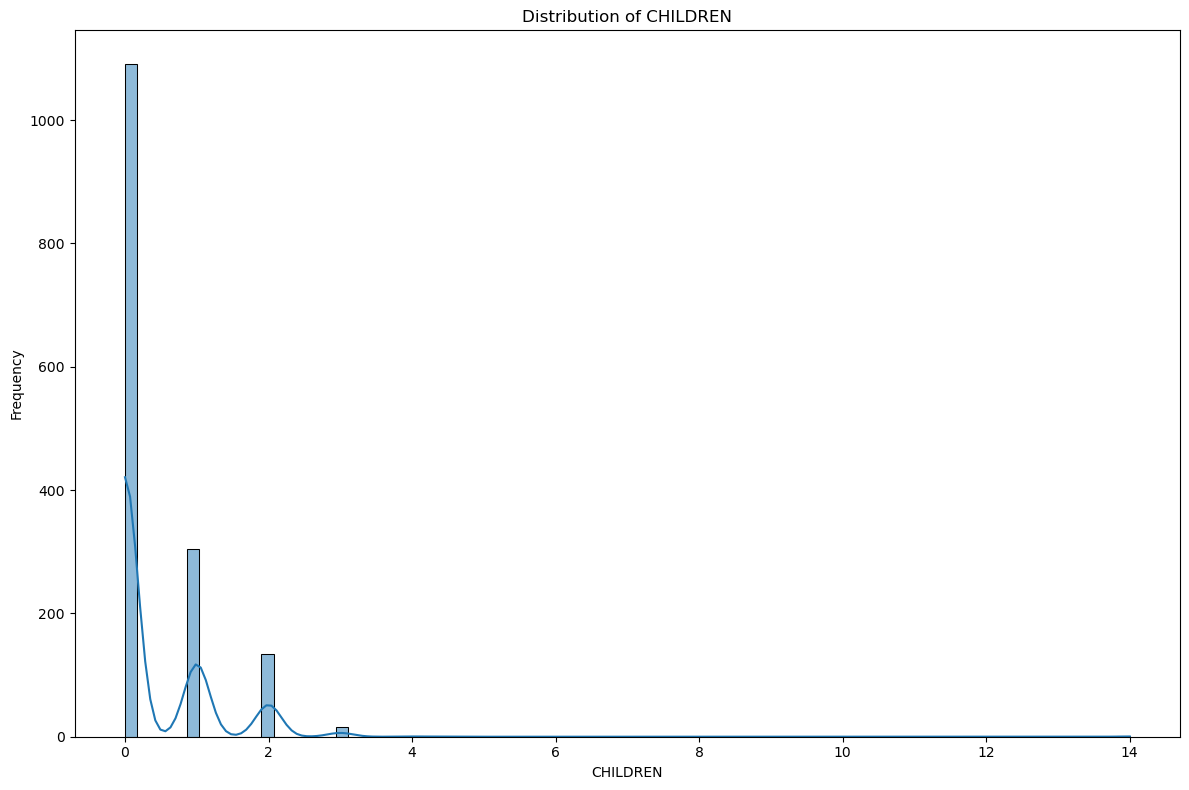

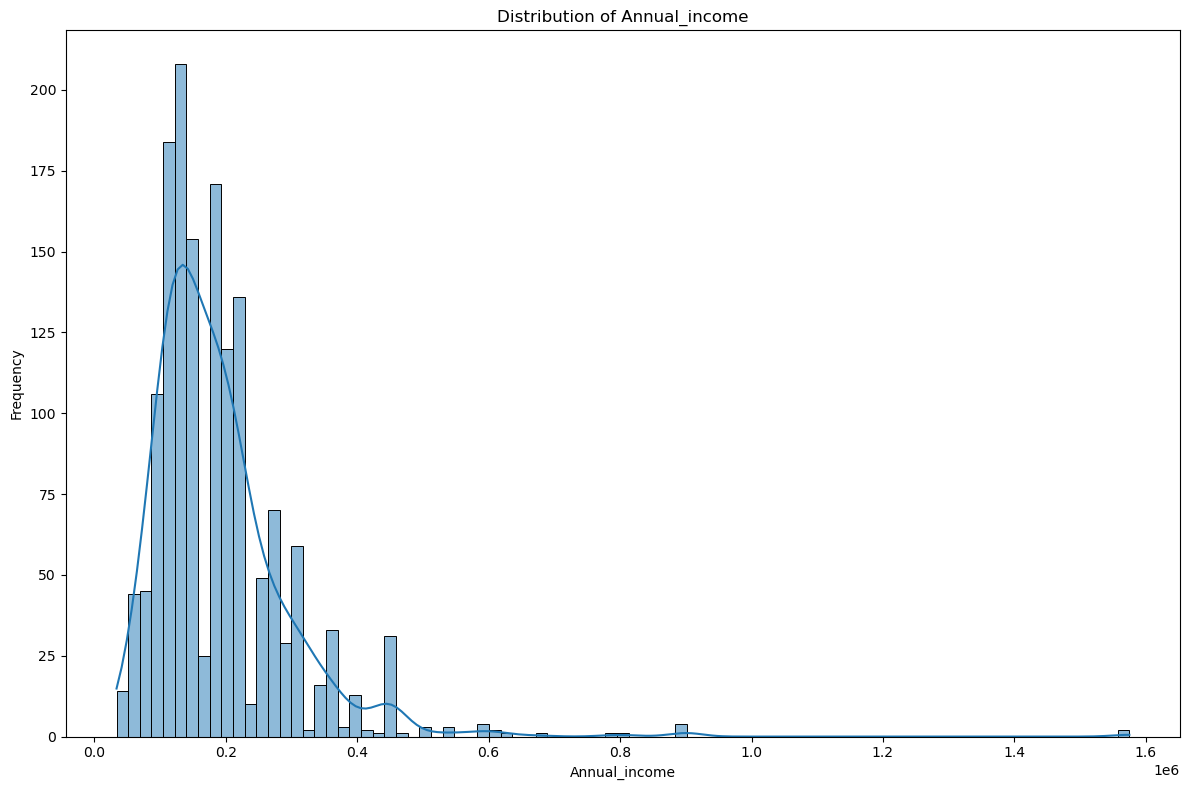

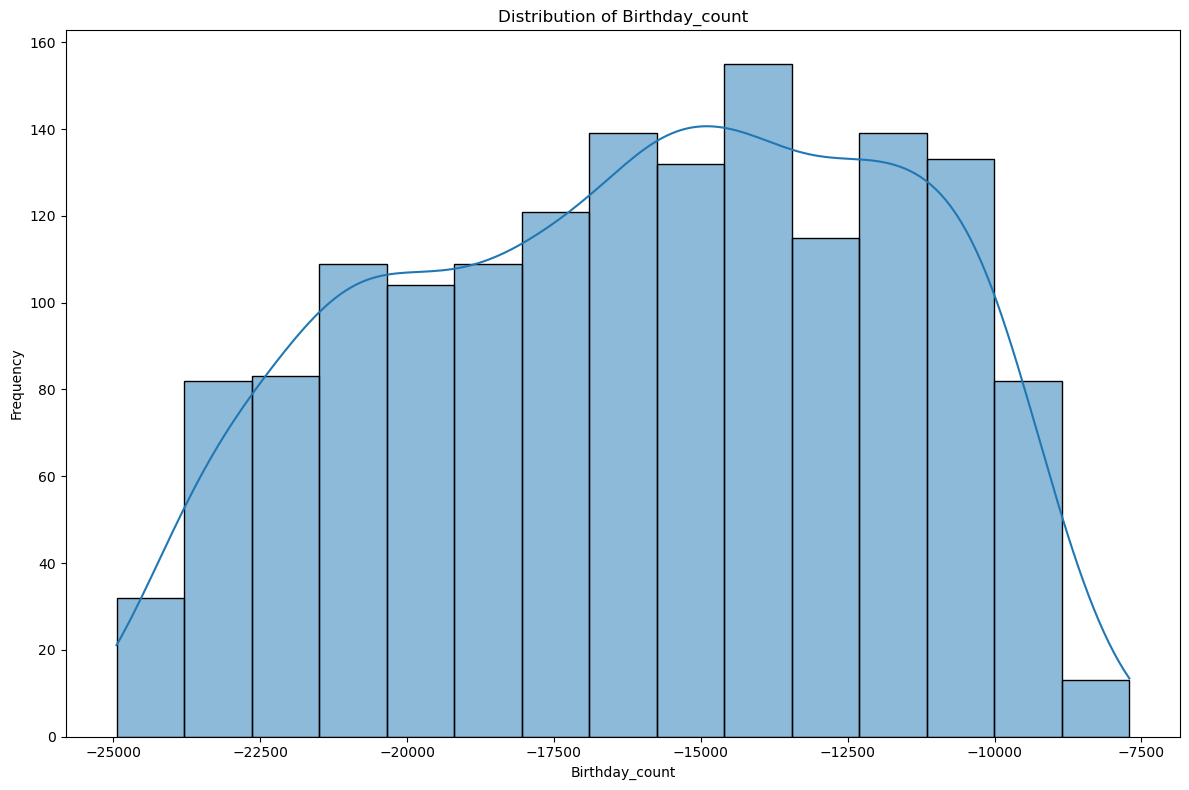

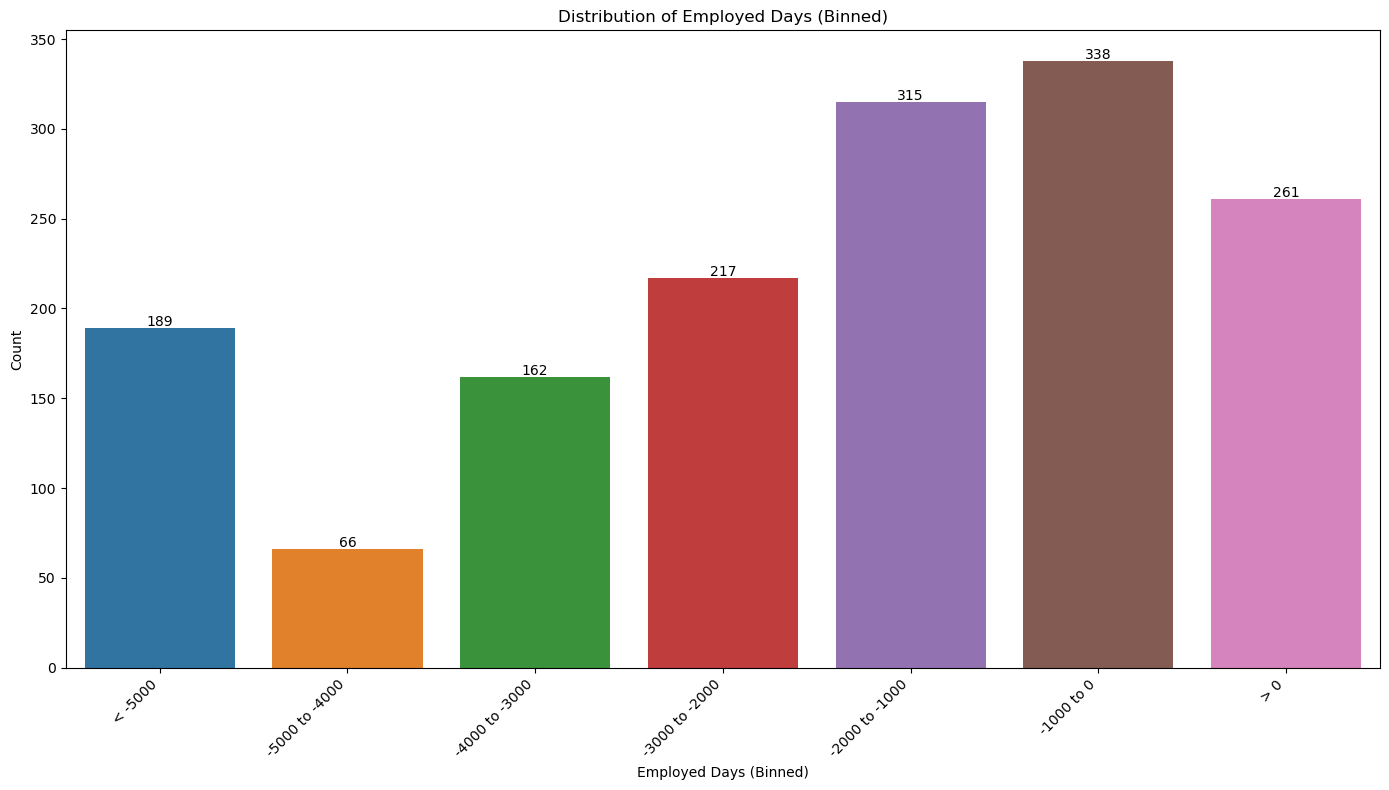

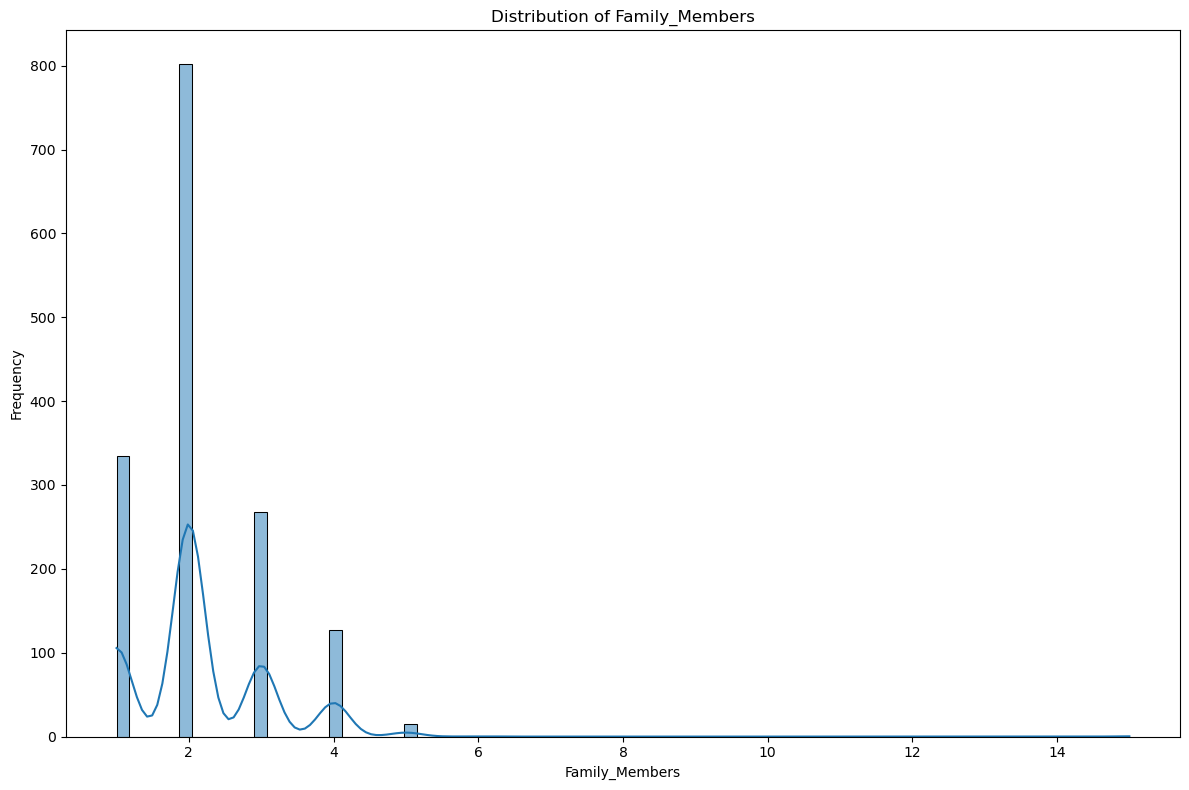

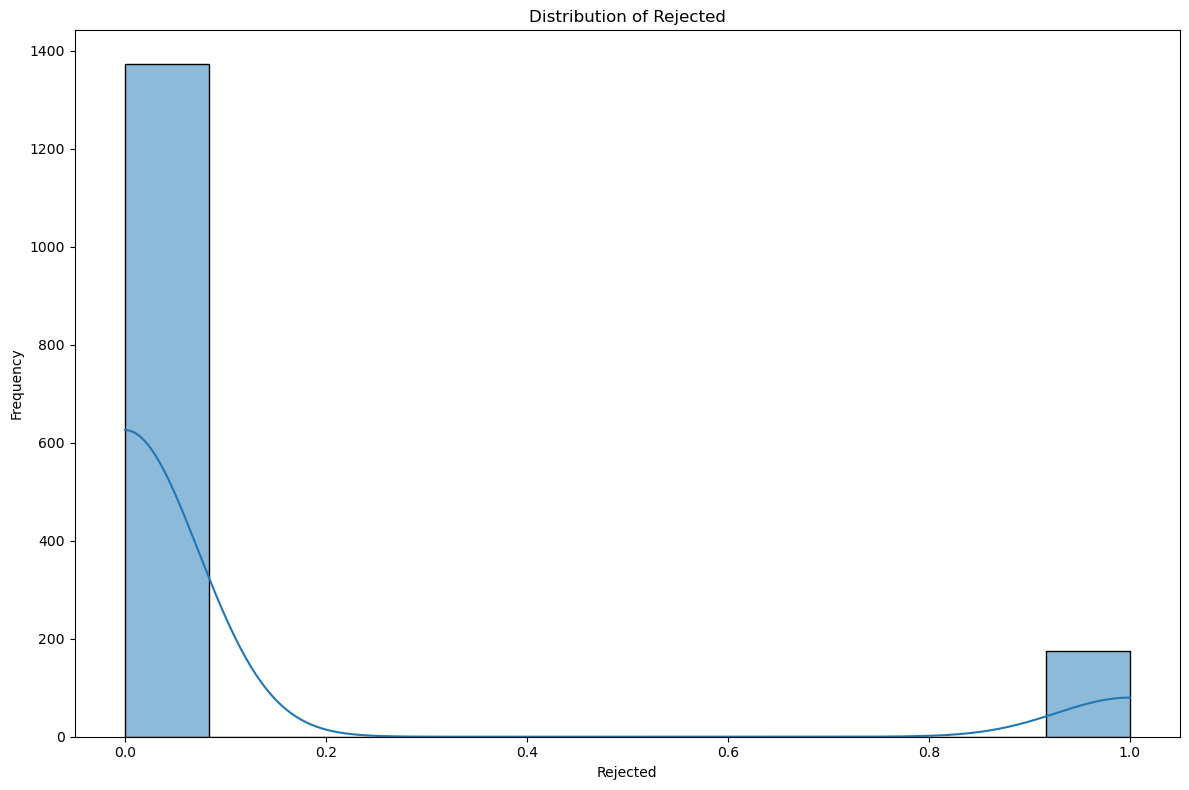

In [145]:
# Define bin ranges and labels for grouping 'Employed_days'
bins = [-float('inf'), -5000, -4000, -3000, -2000, -1000, 0, float('inf')]
labels = ['< -5000', '-5000 to -4000', '-4000 to -3000', '-3000 to -2000', '-2000 to -1000', '-1000 to 0', '> 0']
# Check if Employed_days exists in the dataset and create binned categories
if 'Employed_days' in data.columns:
    data['Employed_days_binned'] = pd.cut(data['Employed_days'], bins=bins, labels=labels)
    
# Iterate over all numerical columns to generate plots

for col in numerical_columns:
    if col == 'Employed_days':
        employed_days_counts = data['Employed_days_binned'].value_counts().sort_index()
        plt.figure(figsize=(14, 8))
        # Create a bar plot for the binned data
        ax = sns.barplot(x=employed_days_counts.index, y=employed_days_counts.values)
        # Annotate the bar plot with count values
        for i, v in enumerate(employed_days_counts.values):
            ax.text(i, v + 1, str(v), ha='center', fontsize=10)
        plt.title("Distribution of Employed Days (Binned)")
        plt.xlabel("Employed Days (Binned)")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        # Create a histogram for other numerical columns
        plt.figure(figsize=(12, 8))
        sns.histplot(data[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

# Step 6: Categorical Feature Distributions

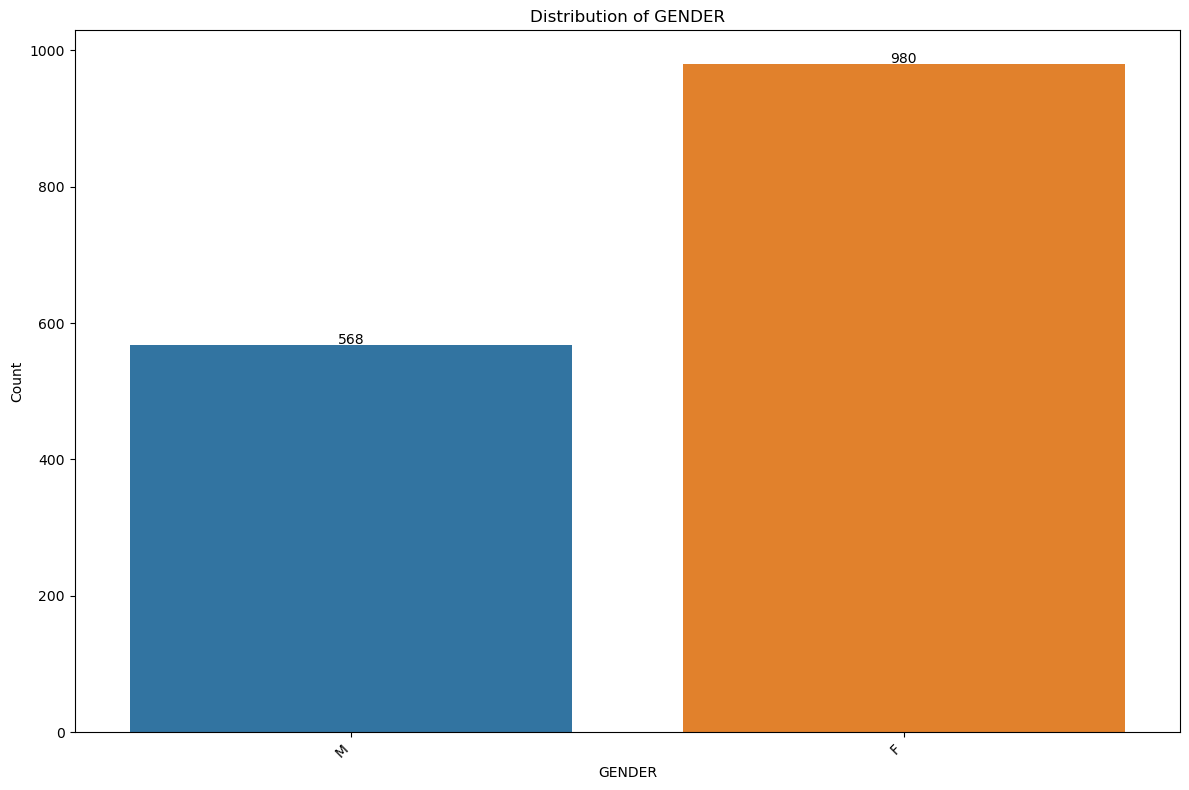

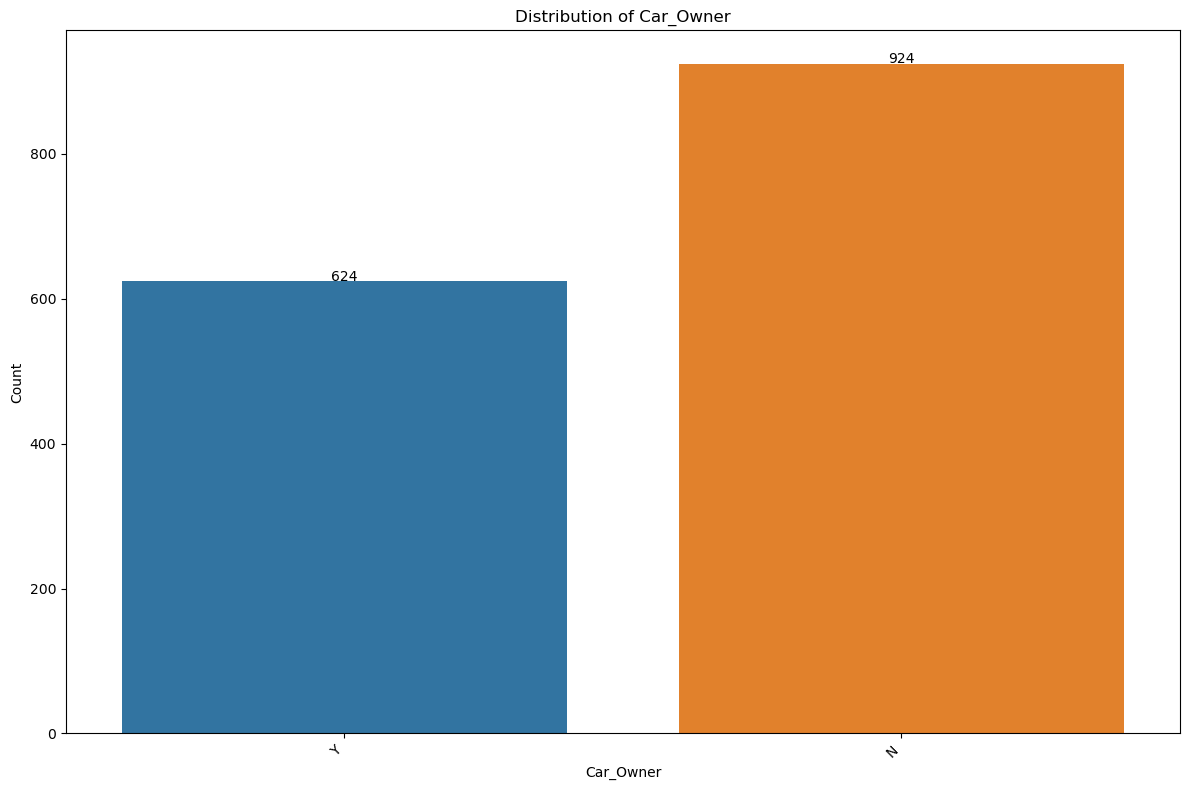

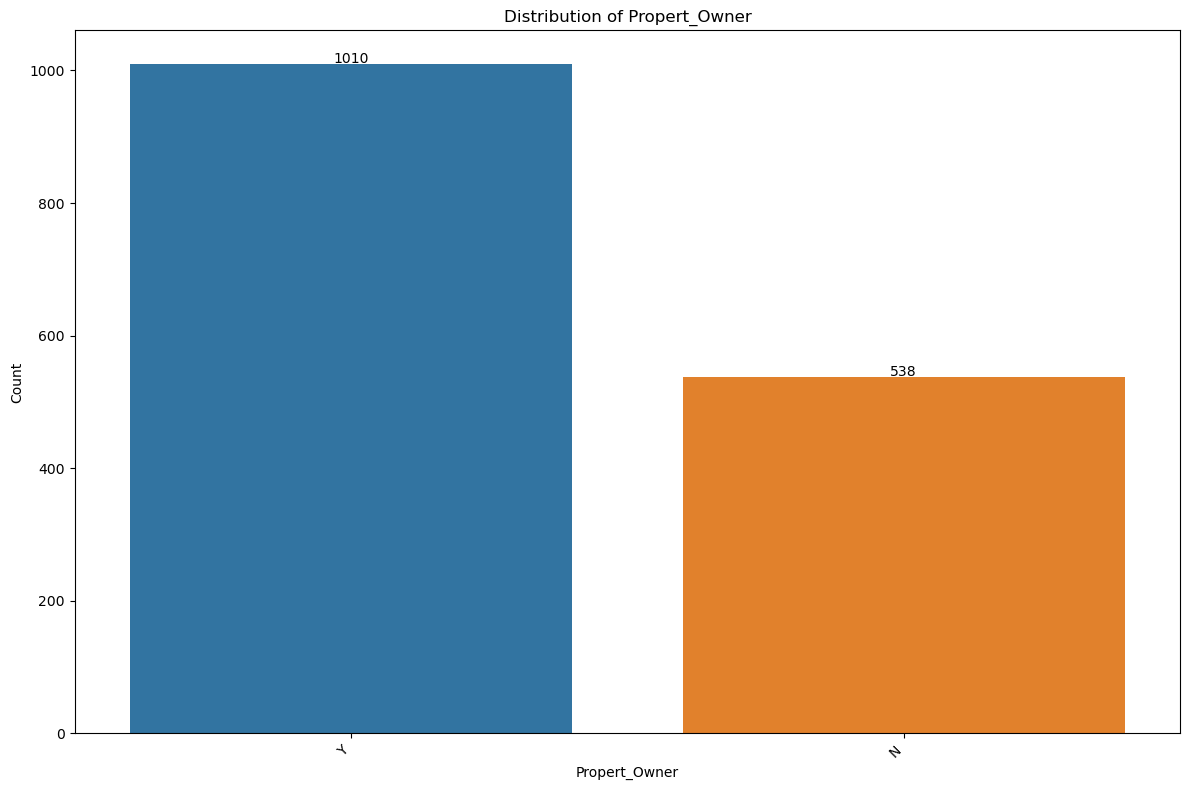

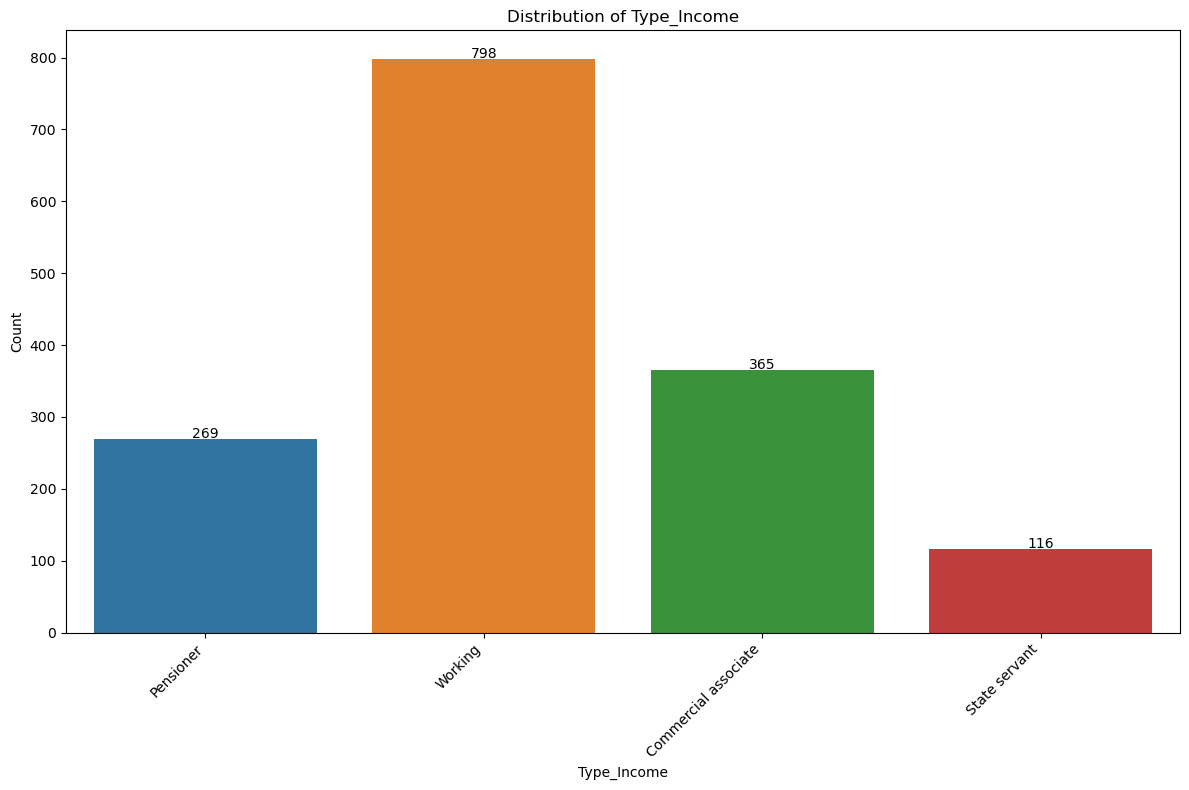

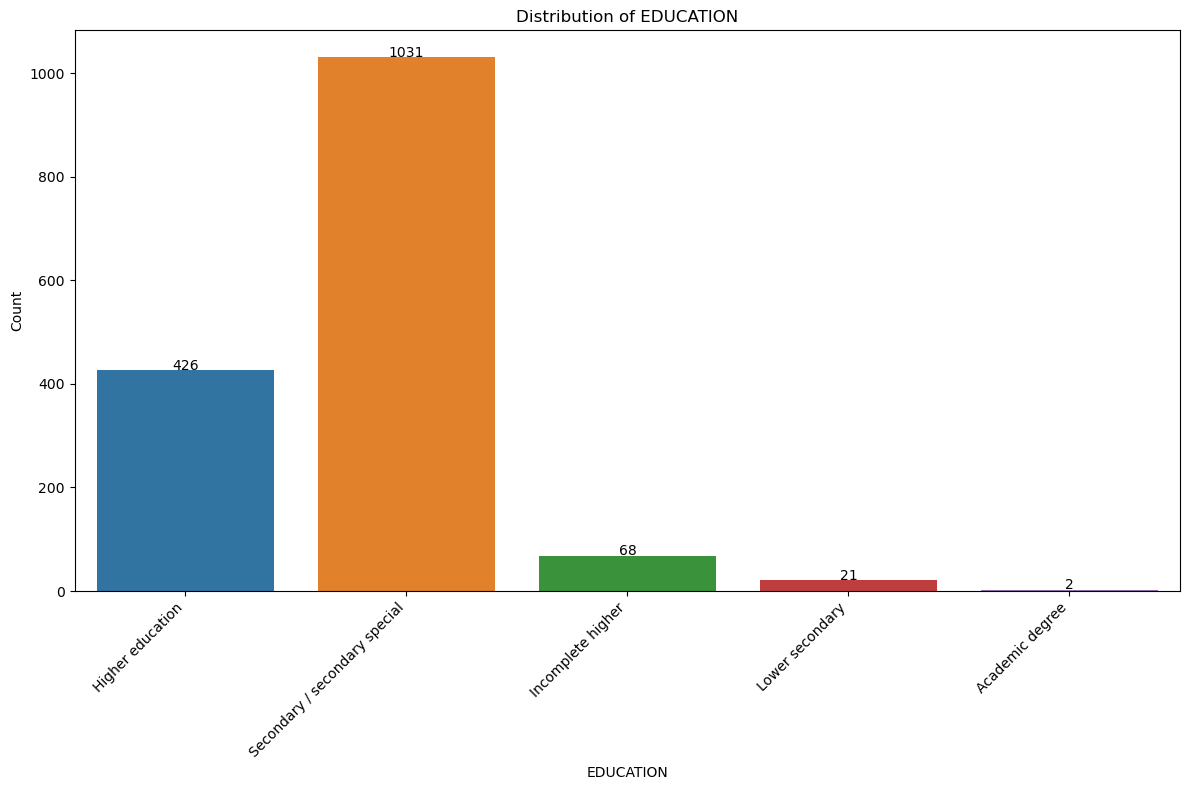

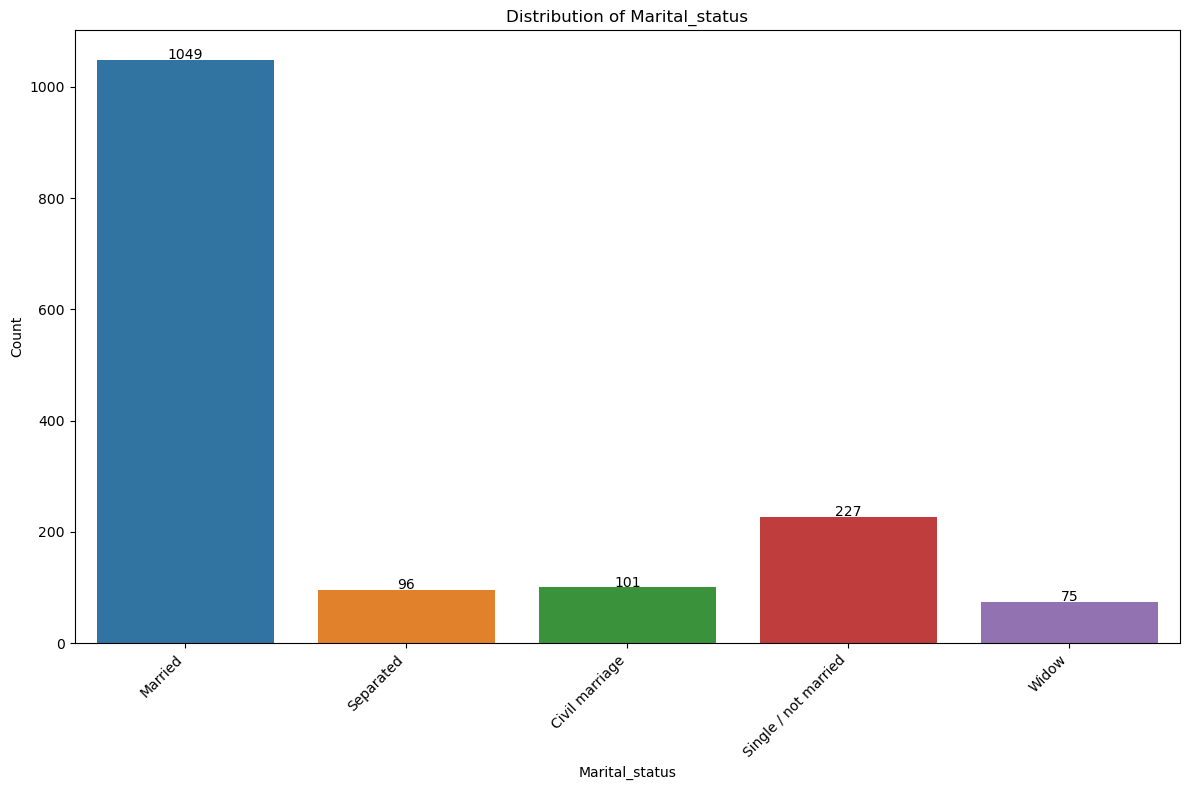

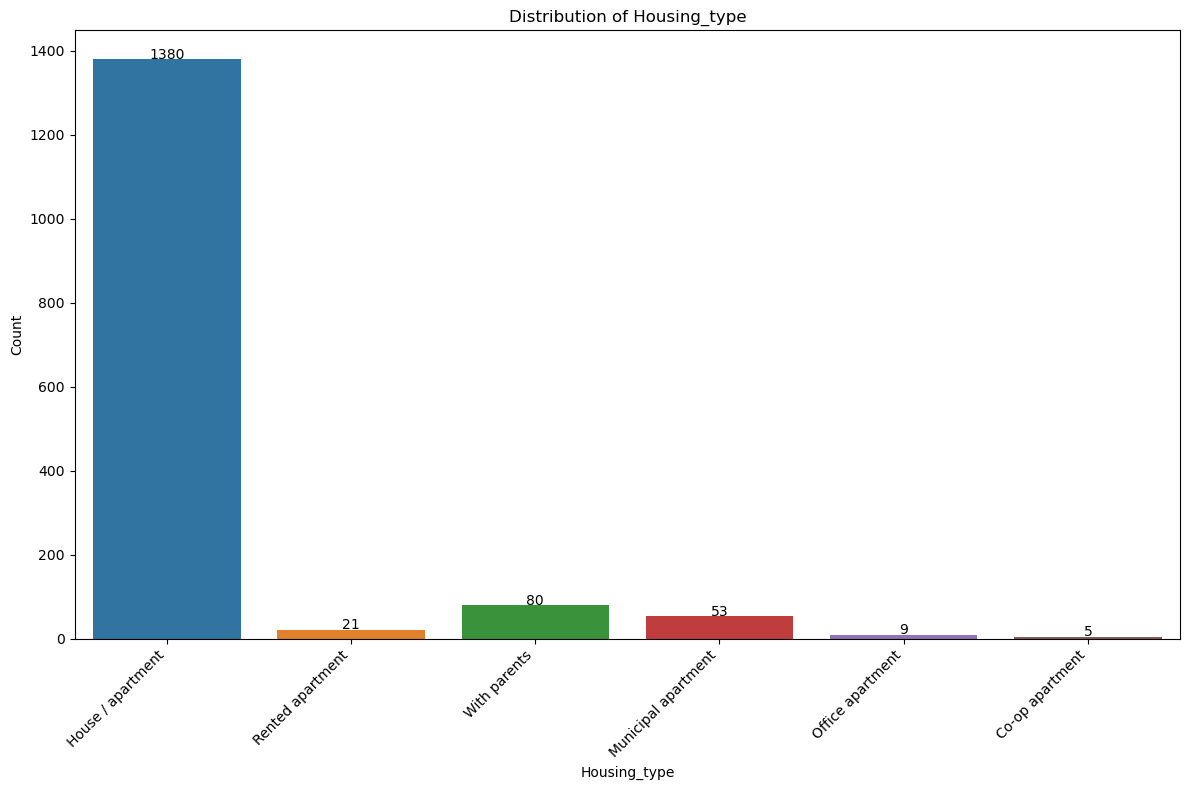

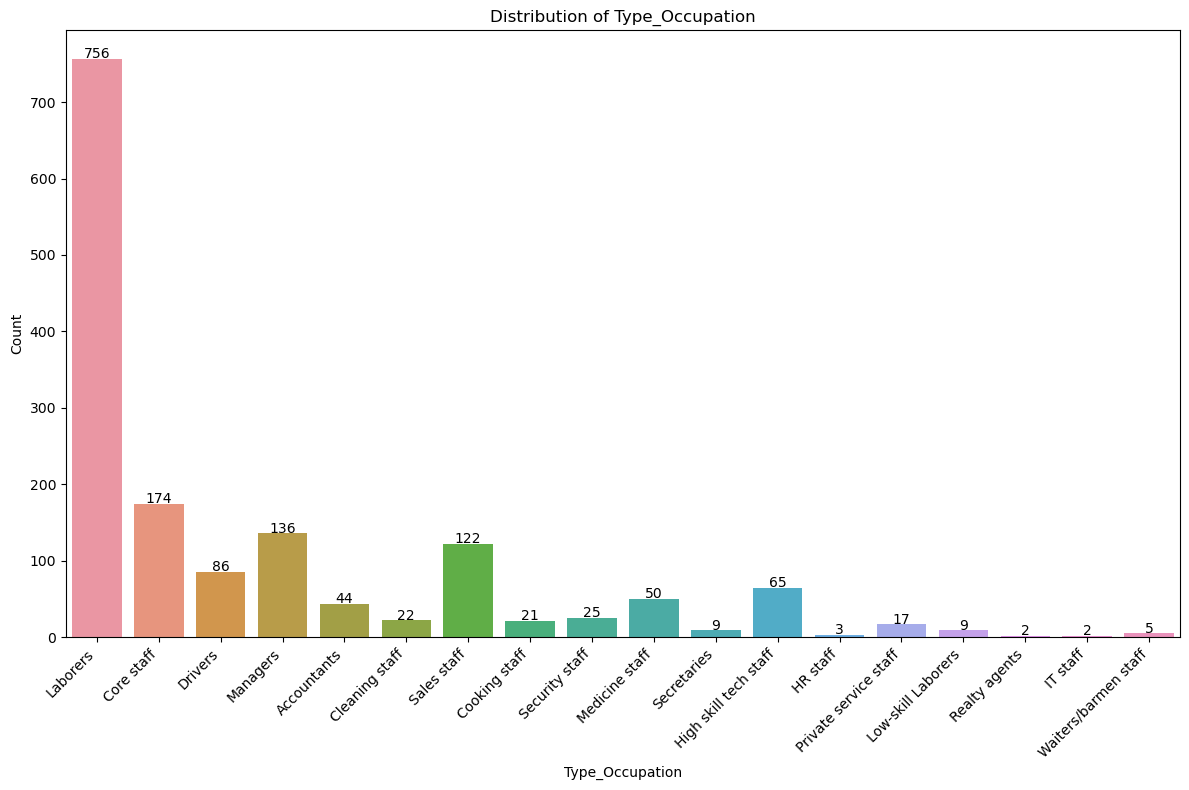

In [146]:
# Iterate over all categorical columns to generate count plots
for col in categorical_columns:
    plt.figure(figsize=(12, 8))
    # Create a count plot for the current categorical column
    ax = sns.countplot(x=data[col])
    # Annotate each bar in the count plot with its count value
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, str(int(p.get_height())), ha='center', fontsize=10)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Step 7: Target Variable Distribution

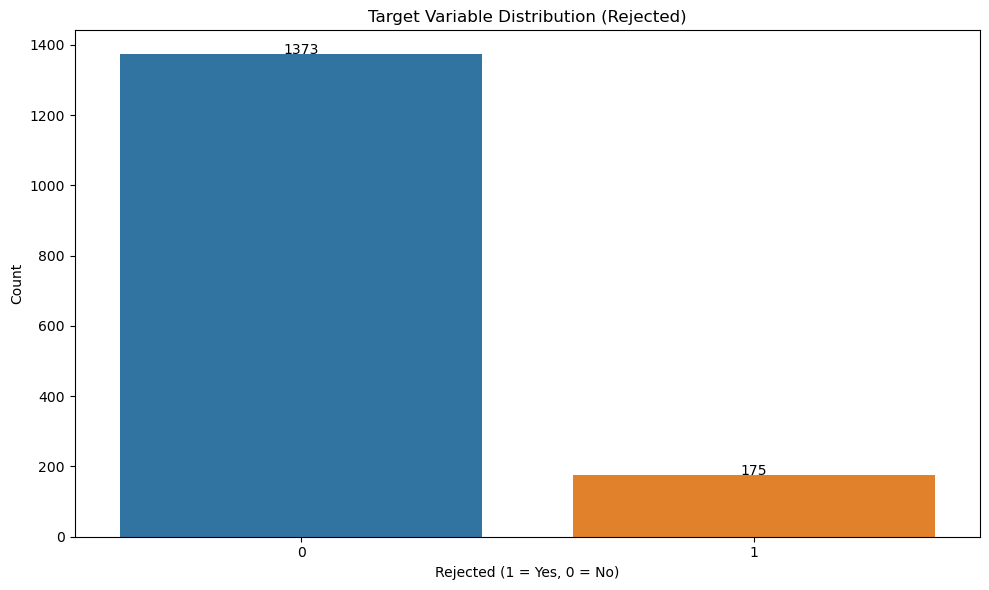

In [147]:
# Check if the 'Rejected' column exists in the dataset
if 'Rejected' in data.columns:
    plt.figure(figsize=(10, 6))
    # Create a count plot for the 'Rejected' column
    ax = sns.countplot(x=data['Rejected'])
    # Annotate each bar in the count plot with its count value
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, str(int(p.get_height())), ha='center', fontsize=10)
    plt.title("Target Variable Distribution (Rejected)")
    plt.xlabel("Rejected (1 = Yes, 0 = No)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Step 8: Pairwise Relationships (Pairplot)

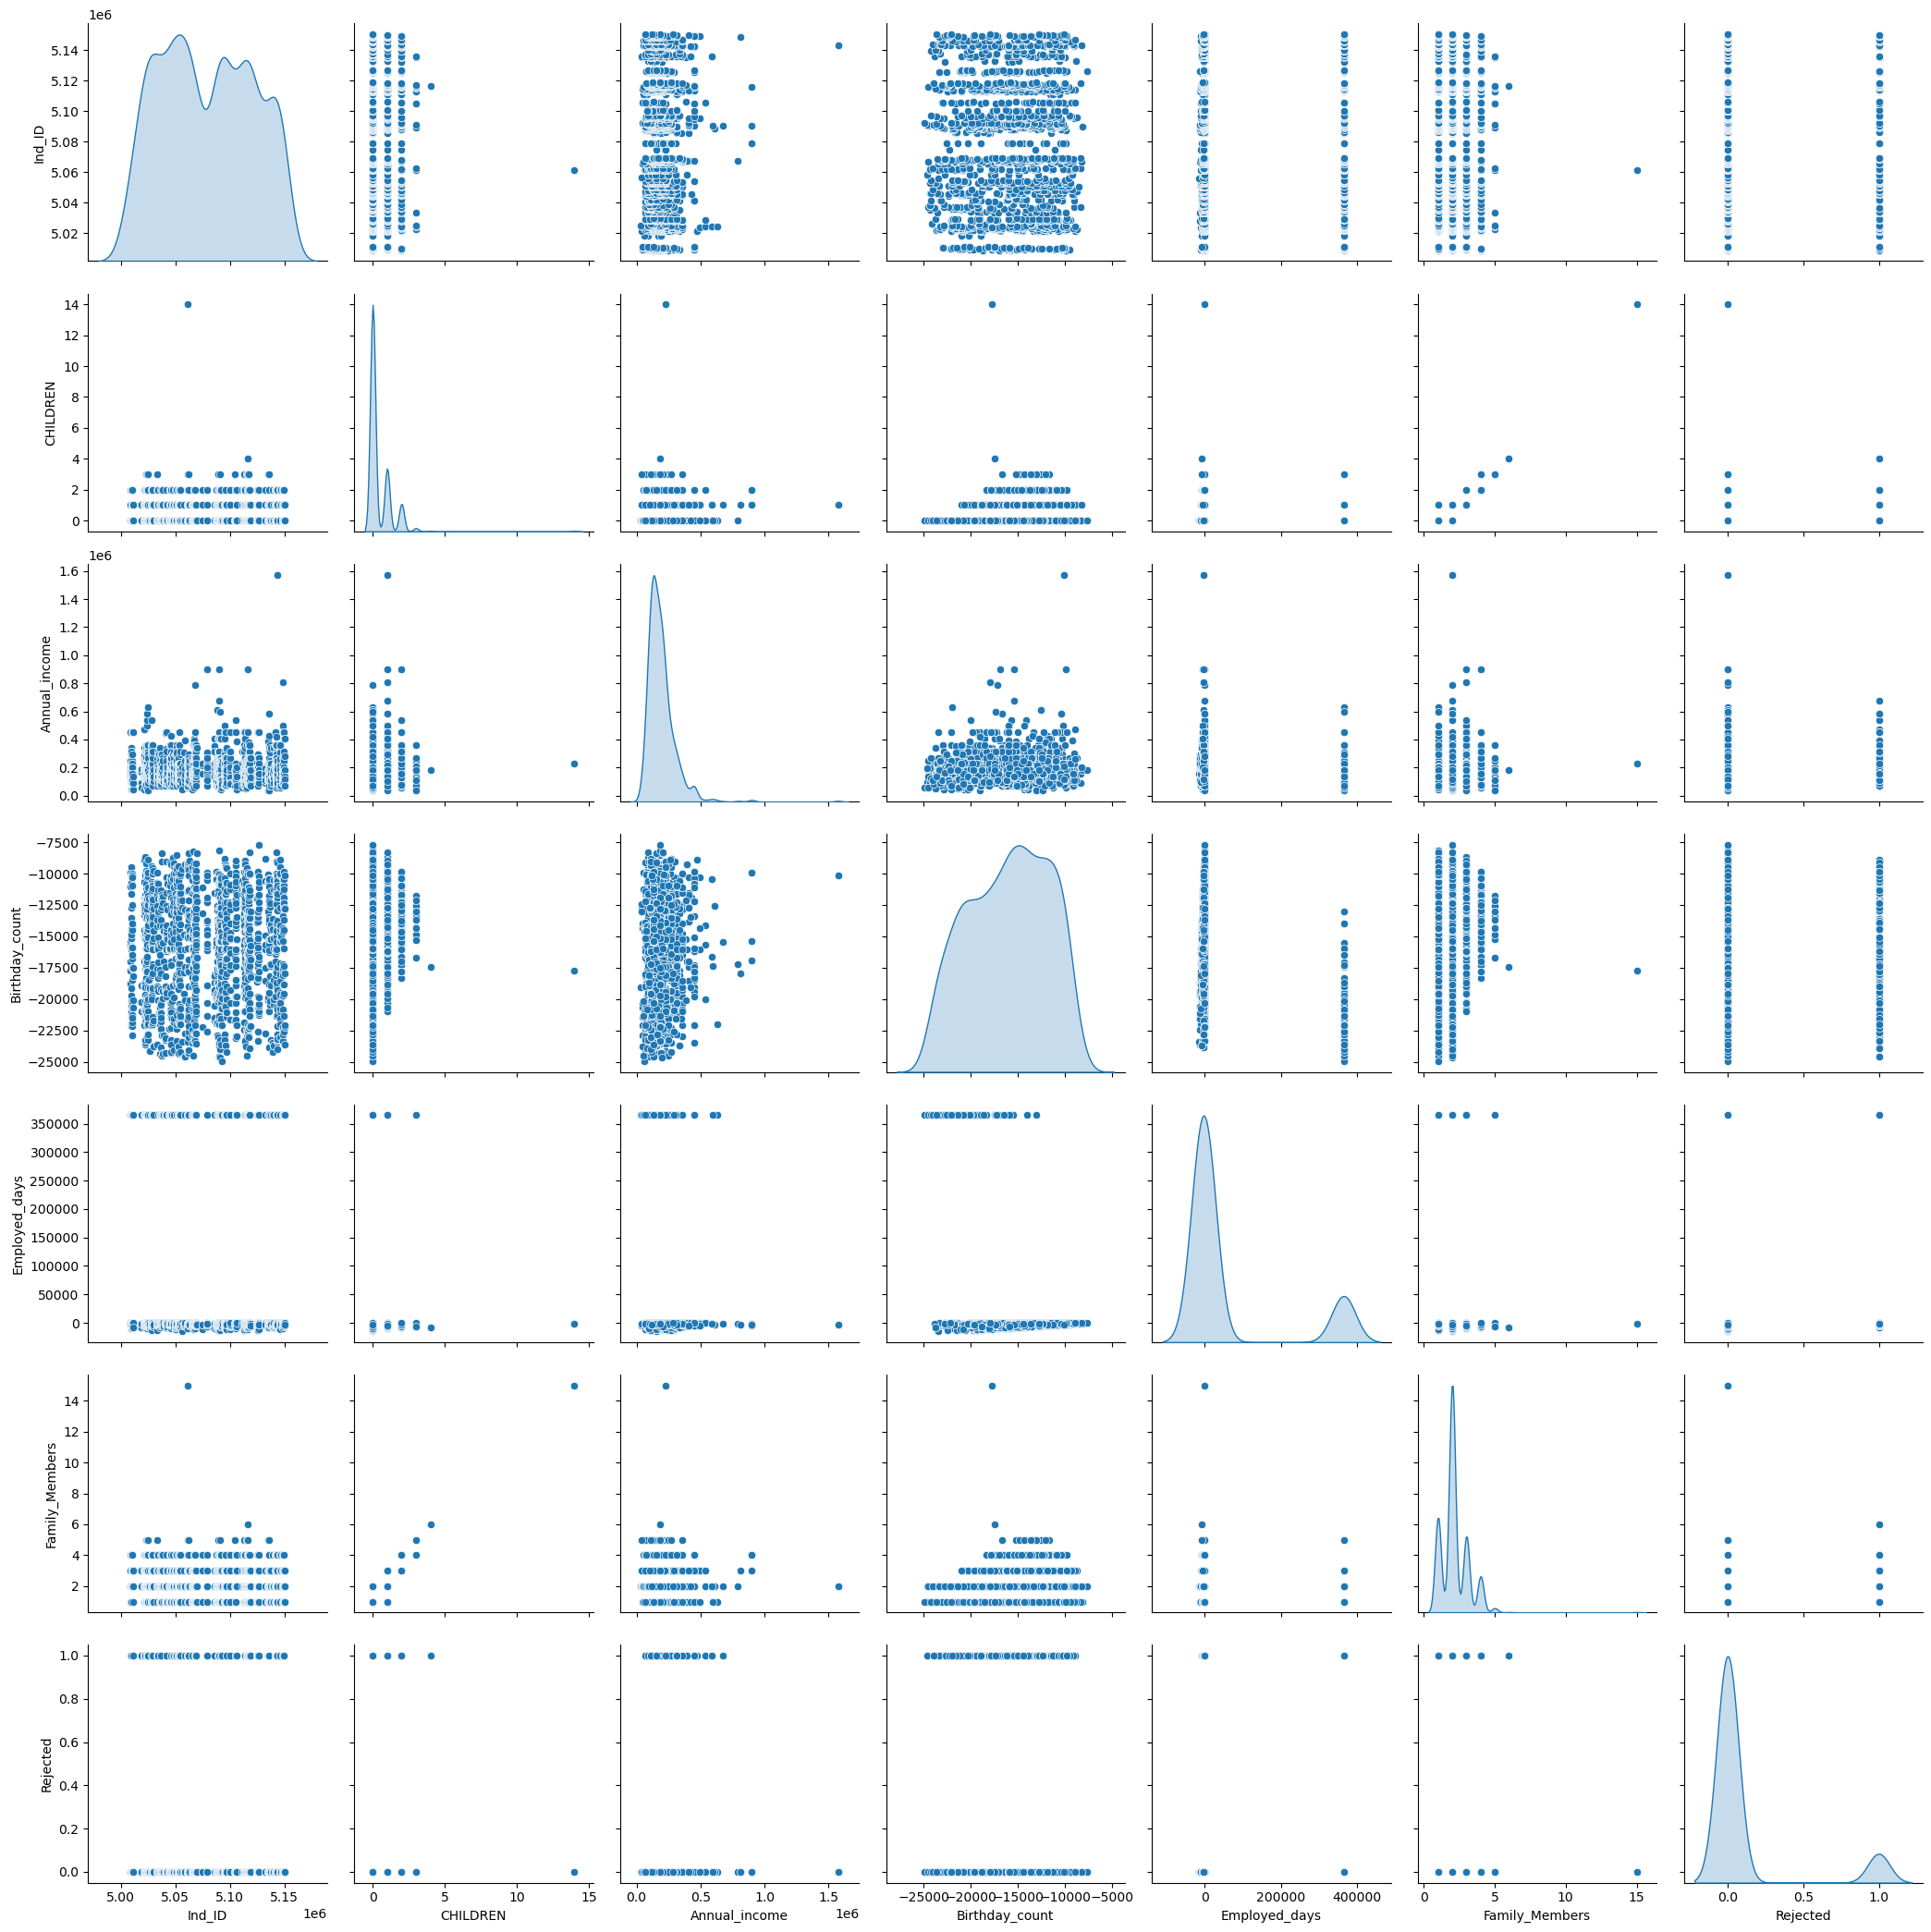

In [148]:
# Create a pairplot for all valid numerical columns in the dataset
# Use Kernel Density Estimation (KDE) for the diagonal plots
sns.pairplot(data[valid_numerical_columns], height=3, diag_kind="kde")
plt.tight_layout()
plt.show()

# Step 9: Correlation Heatmap

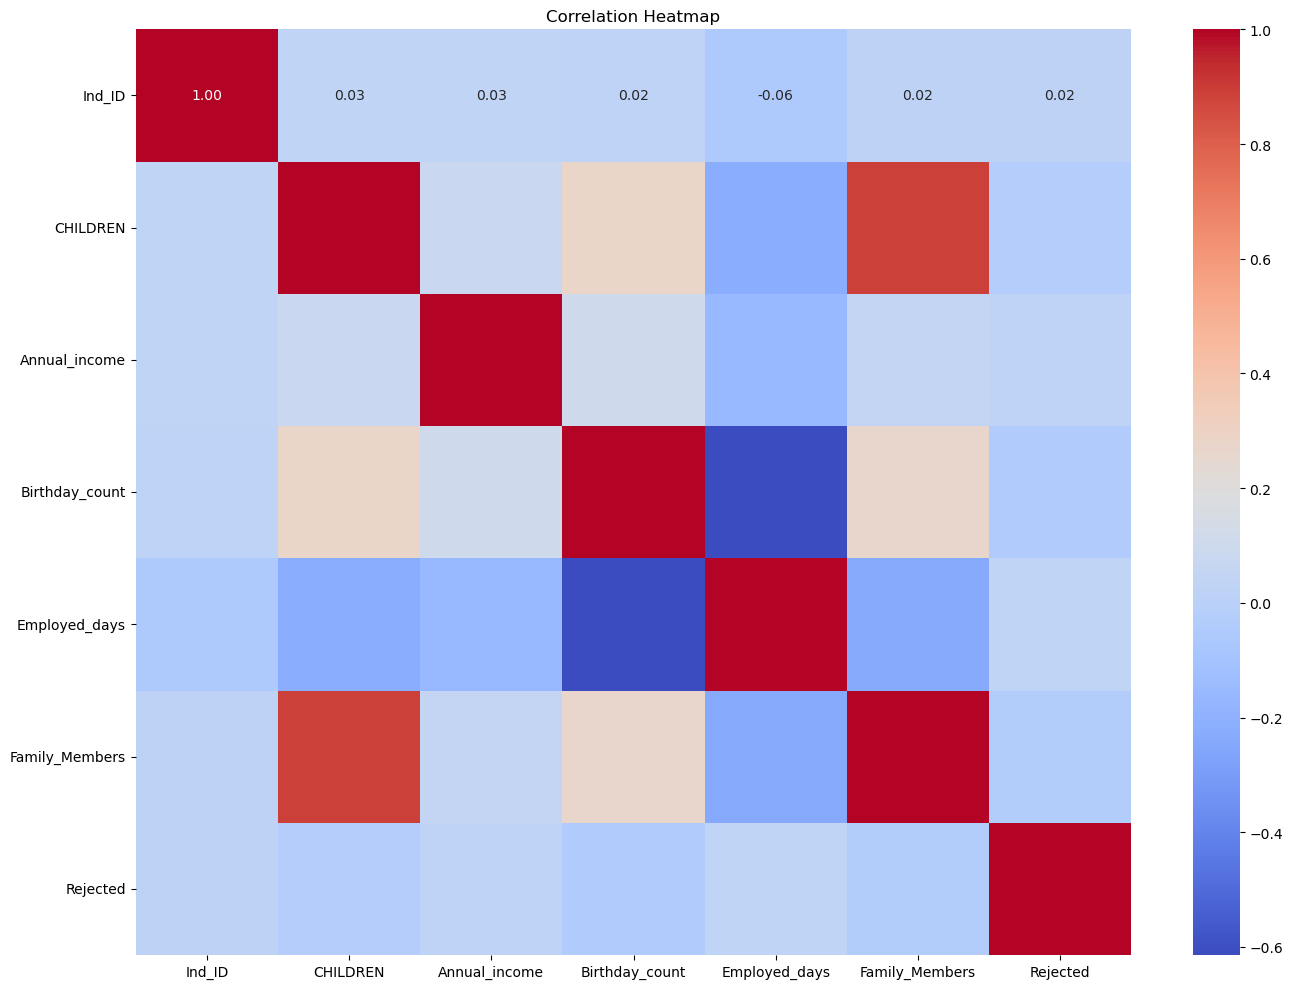

In [150]:
plt.figure(figsize=(14, 10))
# Compute the correlation matrix for numerical columns, replacing NaN values with 0
correlation_matrix = data[numerical_columns].corr().fillna(0)
# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Step 10: Encoding Categorical Variables

In [151]:
import numpy as np

# Extract categorical columns
categorical_indices = [list(data.columns).index(col) for col in ['GENDER', 'Car_Owner']]  # Replace with actual column names
categorical_data = data.iloc[:, categorical_indices].values  # Convert to NumPy array

# Manual One-Hot Encoding
def one_hot_encode(data, column_index):
    unique_values = np.unique(data[:, column_index])  # Get unique values
    one_hot_matrix = np.zeros((data.shape[0], len(unique_values)))  # Initialize zero matrix
    for i, unique_val in enumerate(unique_values):
        one_hot_matrix[:, i] = (data[:, column_index] == unique_val).astype(int)  # Encode as binary
    return one_hot_matrix, unique_values

# Encode all categorical columns
encoded_columns = []
for col_idx in range(categorical_data.shape[1]):
    encoded_matrix, unique_vals = one_hot_encode(categorical_data, col_idx)
    encoded_columns.append(encoded_matrix)

# Combine encoded columns and drop original categorical columns using NumPy
non_categorical_indices = [i for i in range(data.shape[1]) if i not in categorical_indices]
data_without_categorical = data.iloc[:, non_categorical_indices].values  # Convert non-categorical to NumPy
one_hot_encoded = np.hstack(encoded_columns)  # Combine all encoded columns
data_encoded = np.hstack([data_without_categorical, one_hot_encoded])  # Combine encoded and non-categorical data

print("One-Hot Encoding completed successfully.")

One-Hot Encoding completed successfully.


# Step 11: Scaling/Normalization of Numerical Features

In [152]:
import numpy as np

# Define numerical columns to scale
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns.drop('Rejected', errors='ignore')  # Exclude the target variable if present

# Manually scale numerical columns using Z-score normalization
for col in numerical_columns:
    mean = np.mean(data[col])
    std = np.std(data[col])
    data[col] = (data[col] - mean) / std

print("\nScaled Numerical Features (Preview):")
print(data[numerical_columns].head())


Scaled Numerical Features (Preview):
     Ind_ID  CHILDREN  Annual_income  Birthday_count  Employed_days  \
0 -1.680730 -0.531645      -0.101443       -0.650710       2.220314   
1 -1.679819  2.044213      -0.501900        0.066542      -0.453949   
2 -1.679243 -0.531645       0.499242       -0.232412      -0.440695   
3 -1.676582 -0.531645      -0.301672        1.456263      -0.436928   
4 -1.676030  2.044213       0.218922        0.142055      -0.453507   

   Family_Members  
0       -0.170453  
1        1.940442  
2       -1.225901  
3       -0.170453  
4        1.940442  


# Step 12: Splitting Data into Training and Testing Sets

In [153]:
import numpy as np

# Convert data to NumPy arrays
X = data.drop('Rejected', axis=1).values
y = data['Rejected'].astype(int).values  # Ensure the target variable is numeric

# Shuffle the dataset
np.random.seed(42)  # For reproducibility
indices = np.arange(X.shape[0])  # Generate row indices
np.random.shuffle(indices)  # Shuffle the indices

# Split into training and testing sets (80-20 split)
split_idx = int(0.8 * len(indices))  # Compute split index
train_indices, test_indices = indices[:split_idx], indices[split_idx:]  # Split indices

X_train, X_test = X[train_indices], X[test_indices]  # Split features
y_train, y_test = y[train_indices], y[test_indices]  # Split target

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 1238 rows
Testing set size: 310 rows


# Step 13: Relationships Between Numerical Features and Target

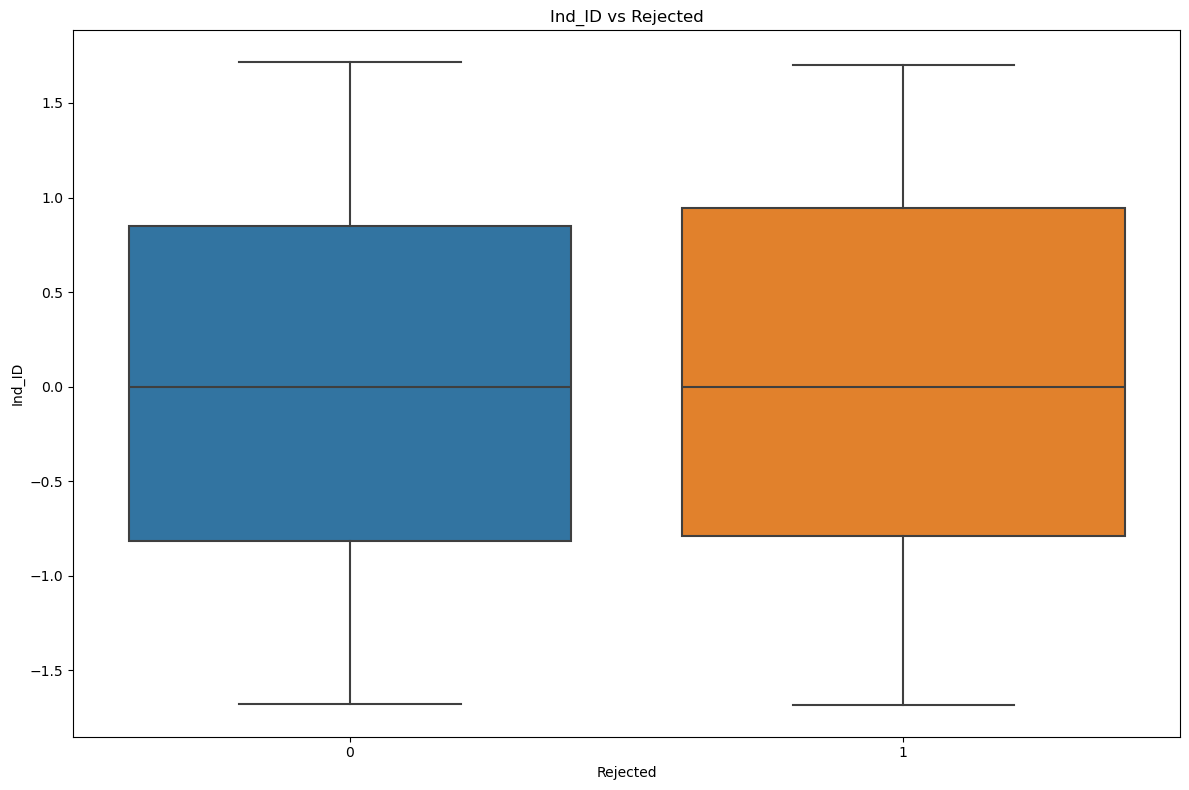

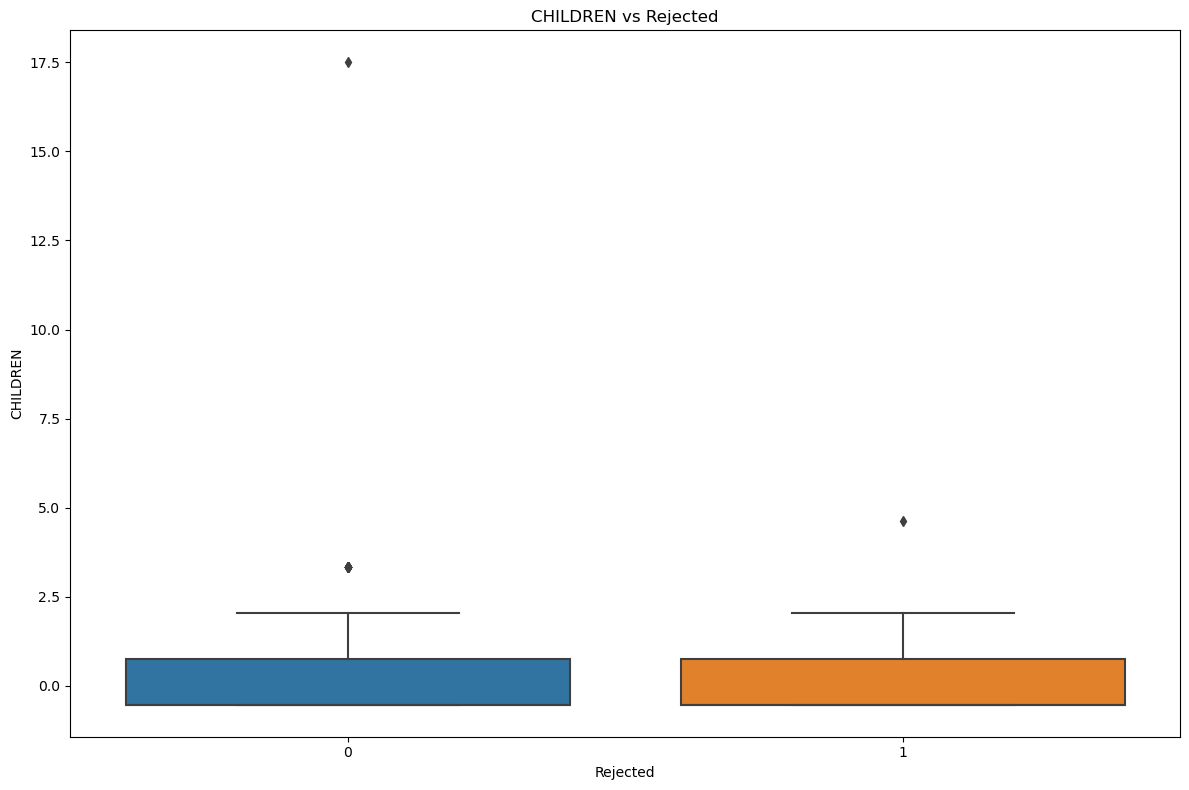

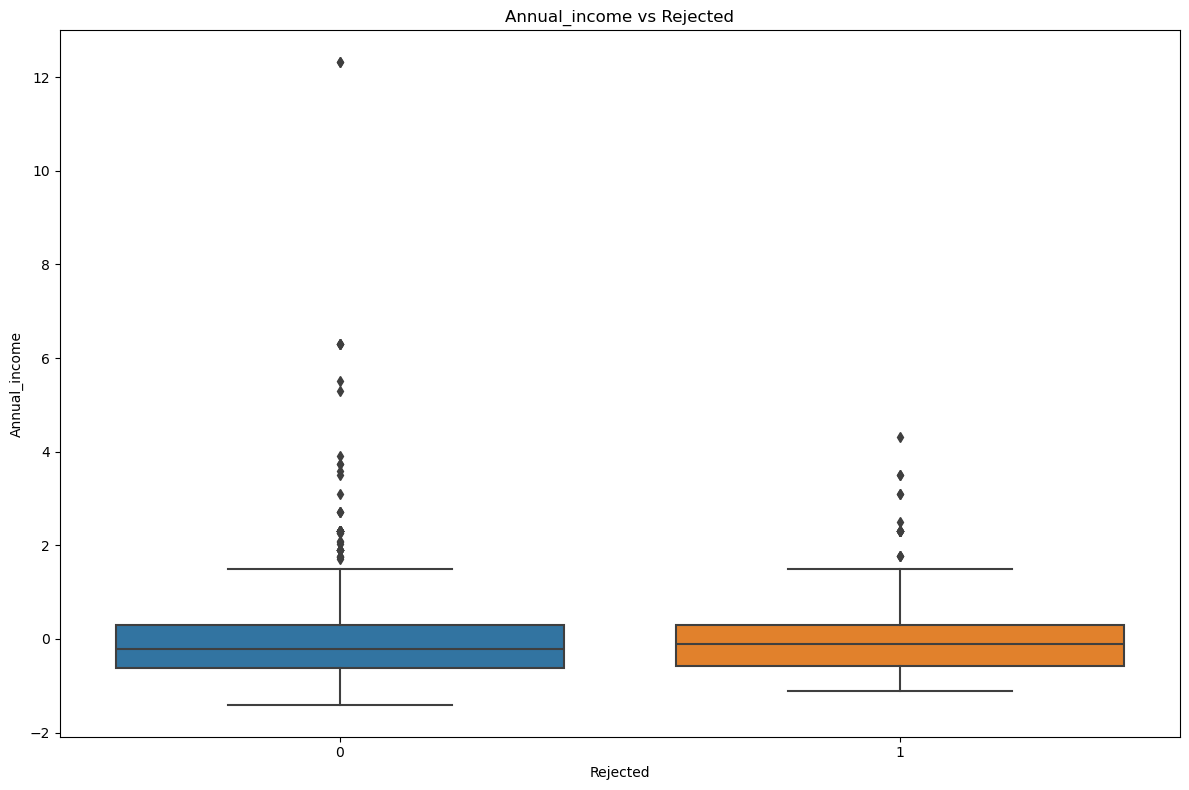

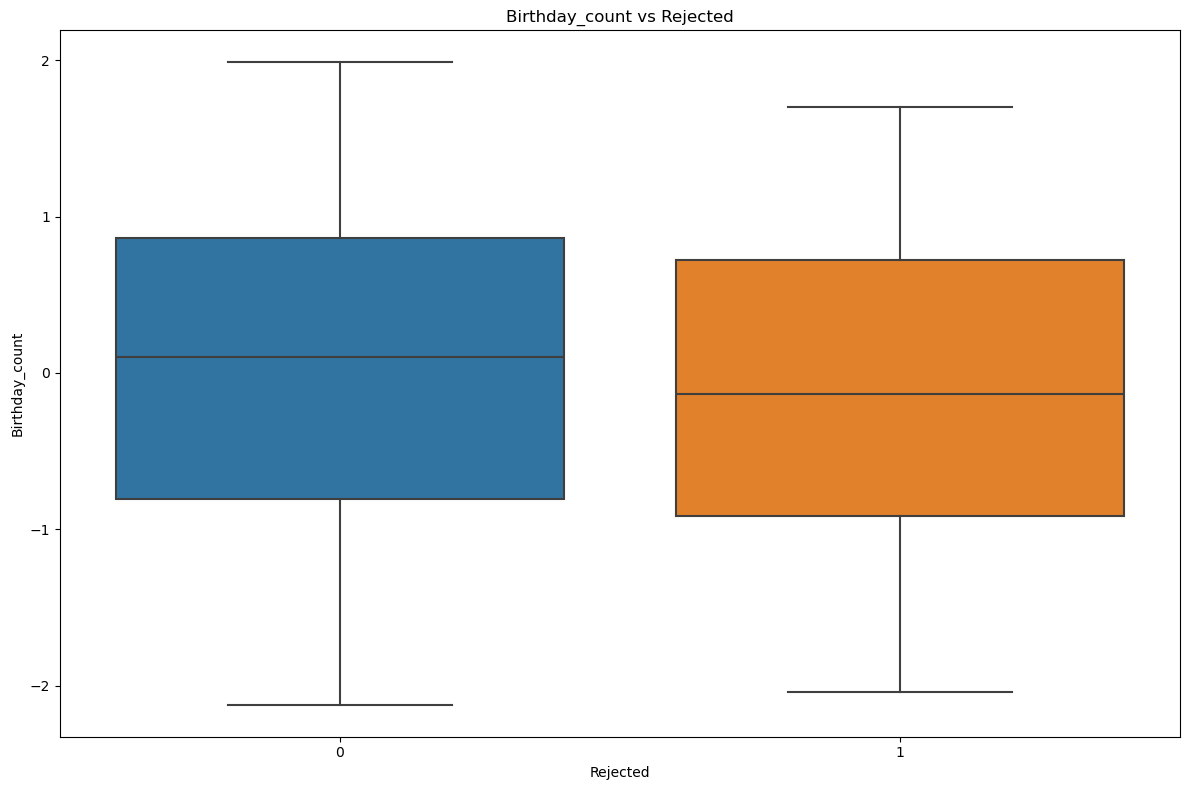

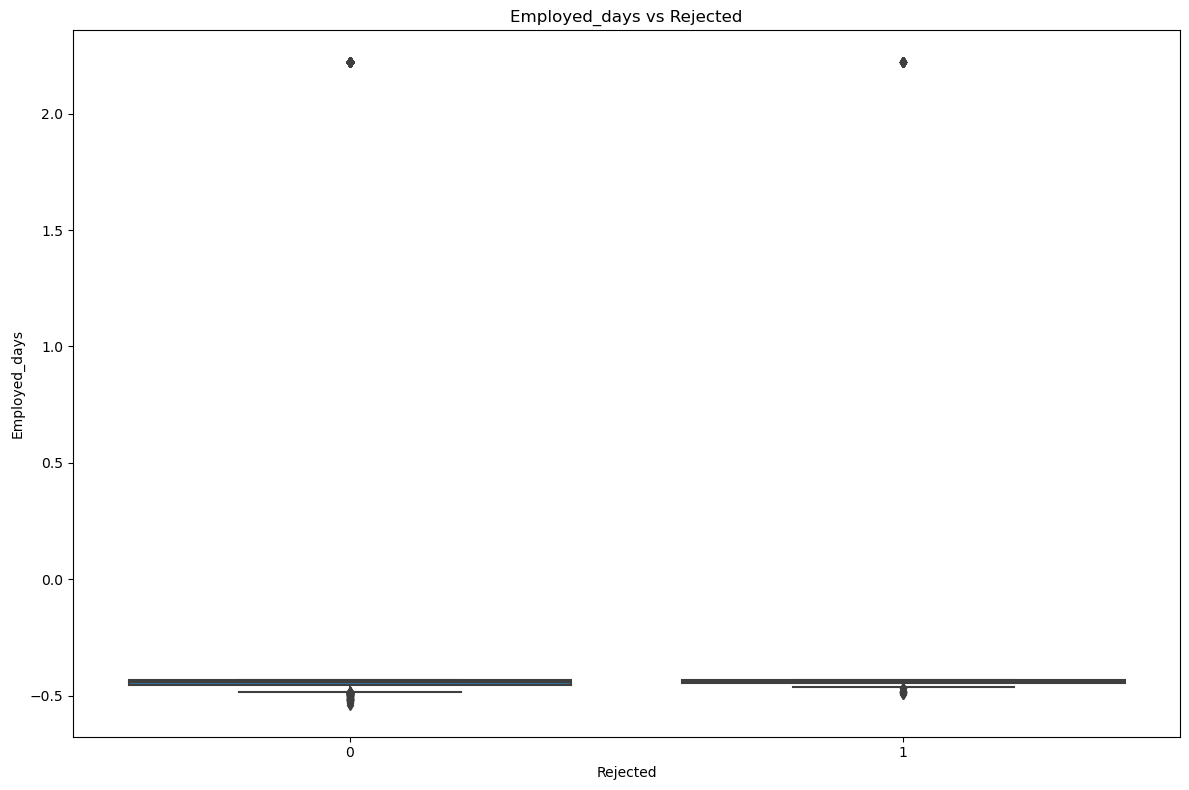

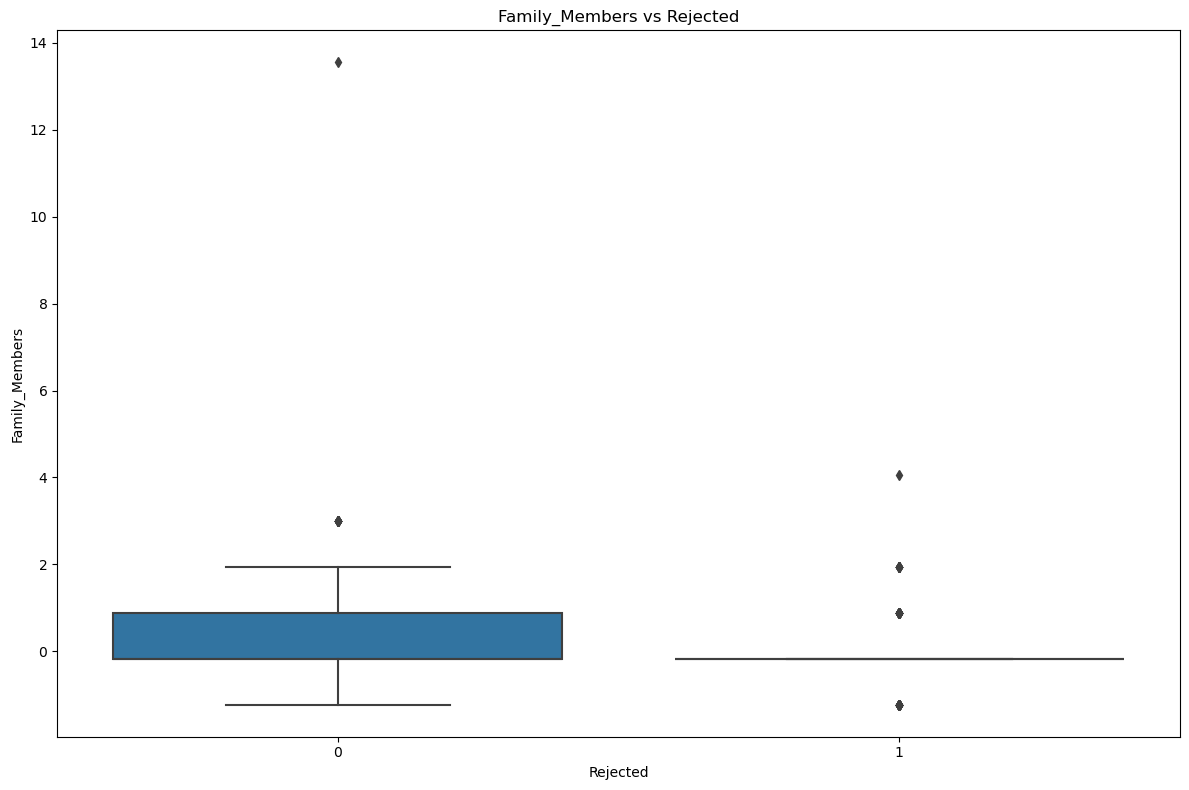

In [154]:
# Check if the Rejected column exists in the dataset
if 'Rejected' in data.columns:
    # Iterate over all numerical columns excluding Rejected itself
    for col in numerical_columns:
        # Ensure the column being processed is not Rejected
        if col != 'Rejected':
            plt.figure(figsize=(12, 8))
            # Create a boxplot to compare the numerical column values against the Rejected categories
            sns.boxplot(x=data['Rejected'], y=data[col])
            plt.title(f"{col} vs Rejected")
            plt.xlabel("Rejected")
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()

# Step 14: Relationships Between Categorical Features and Target

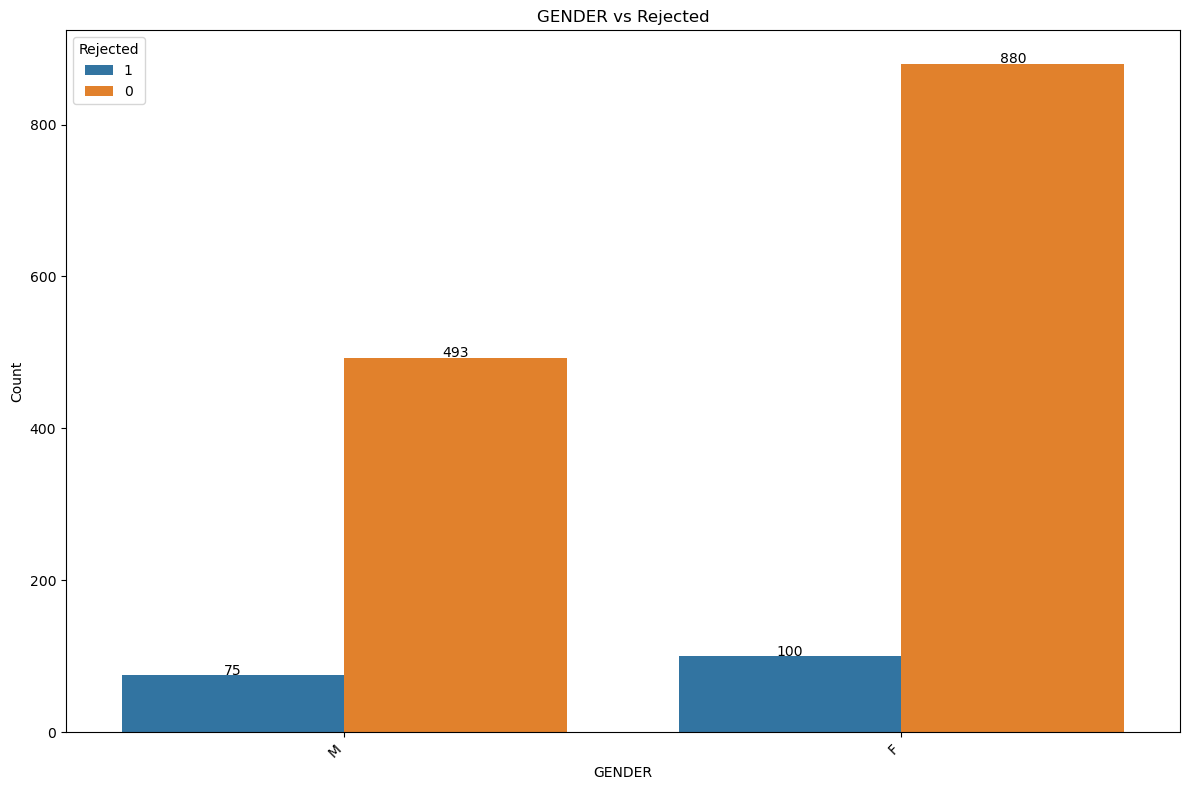

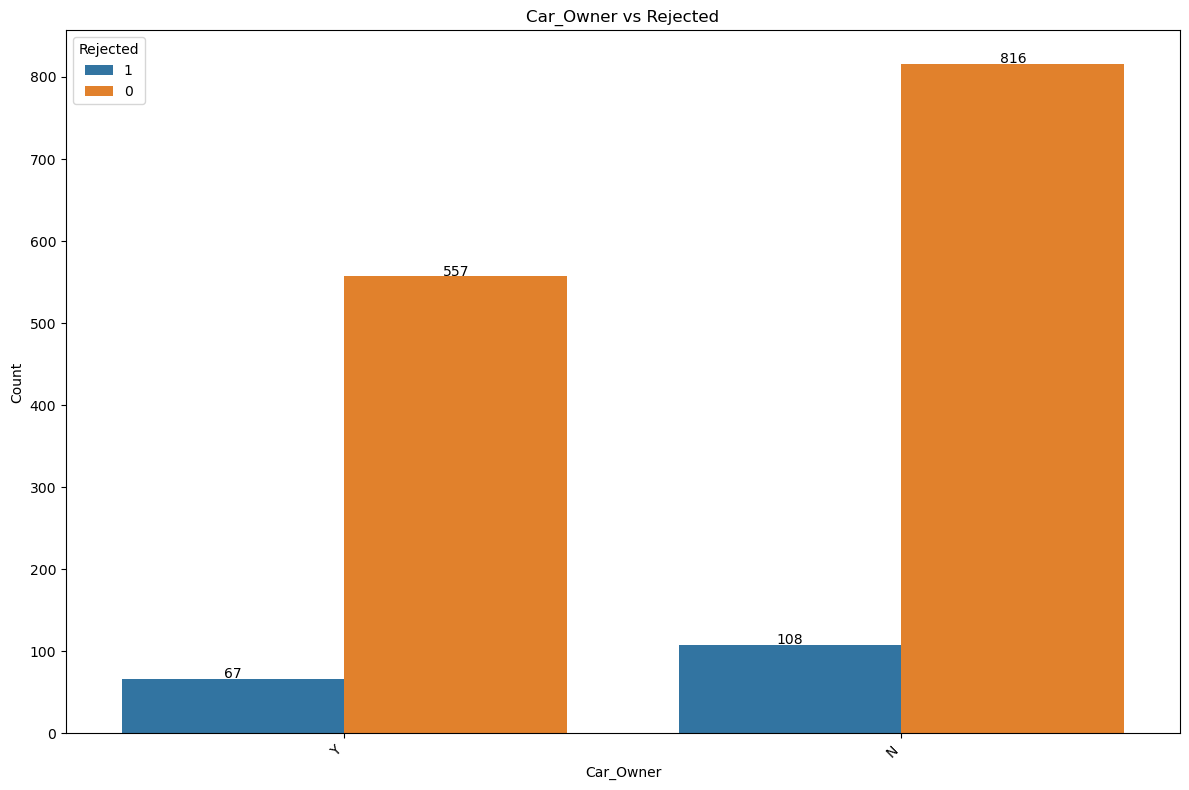

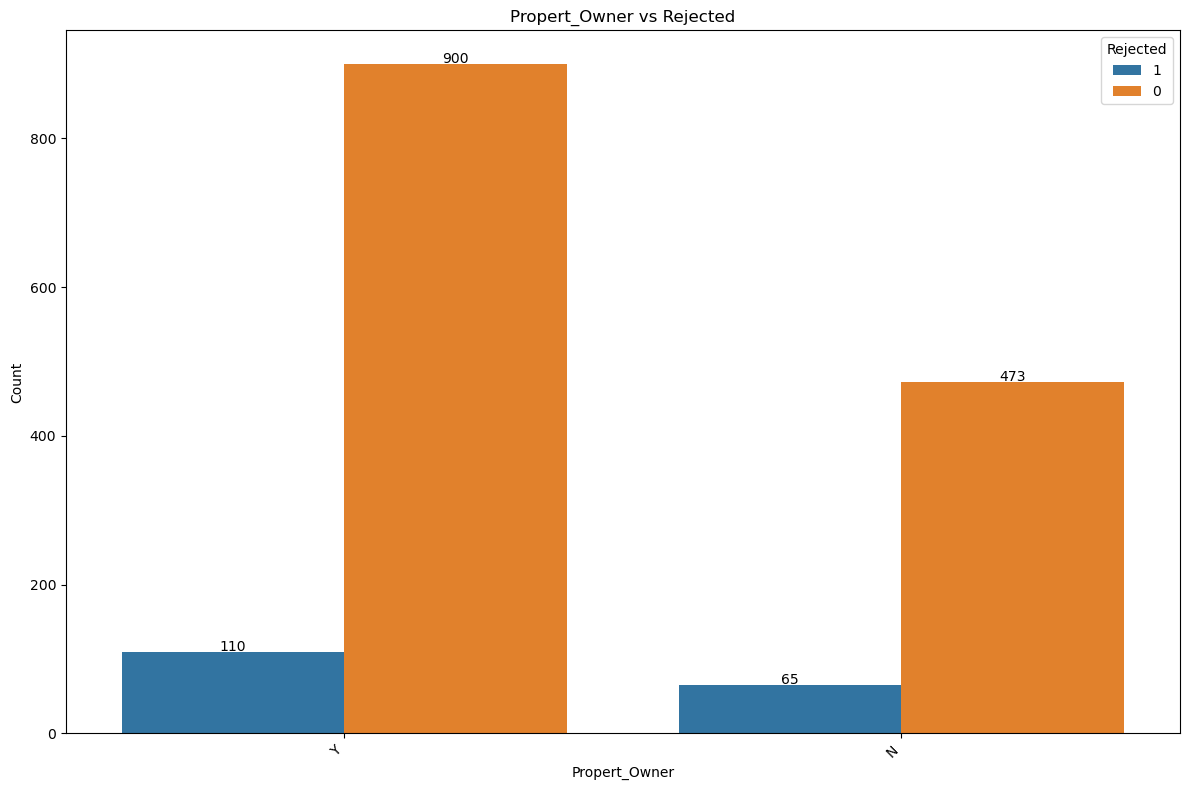

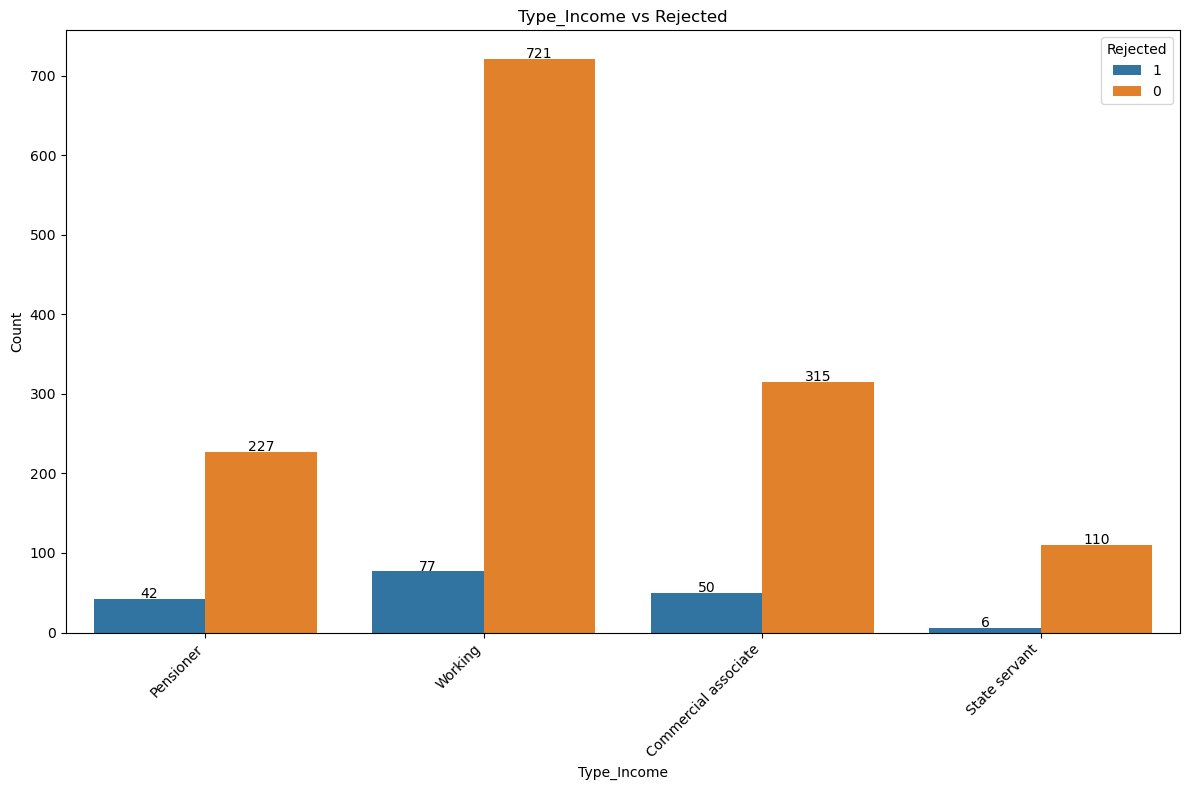

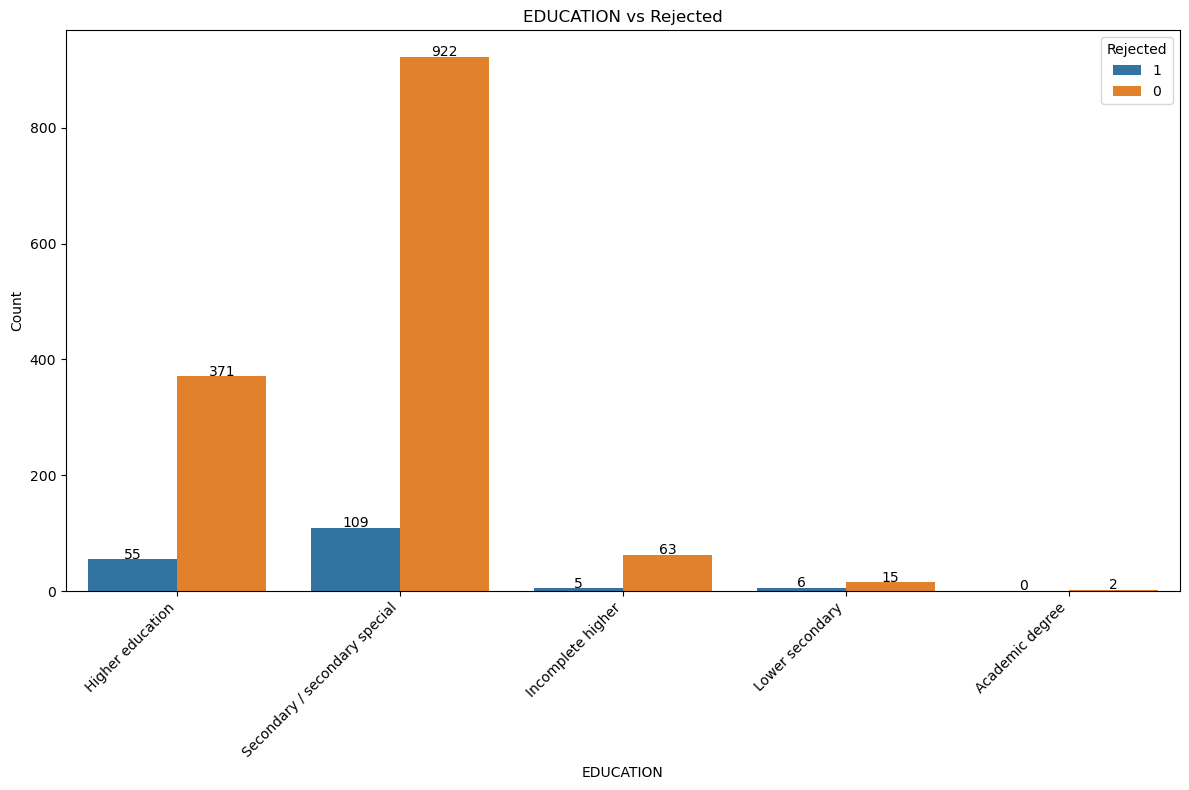

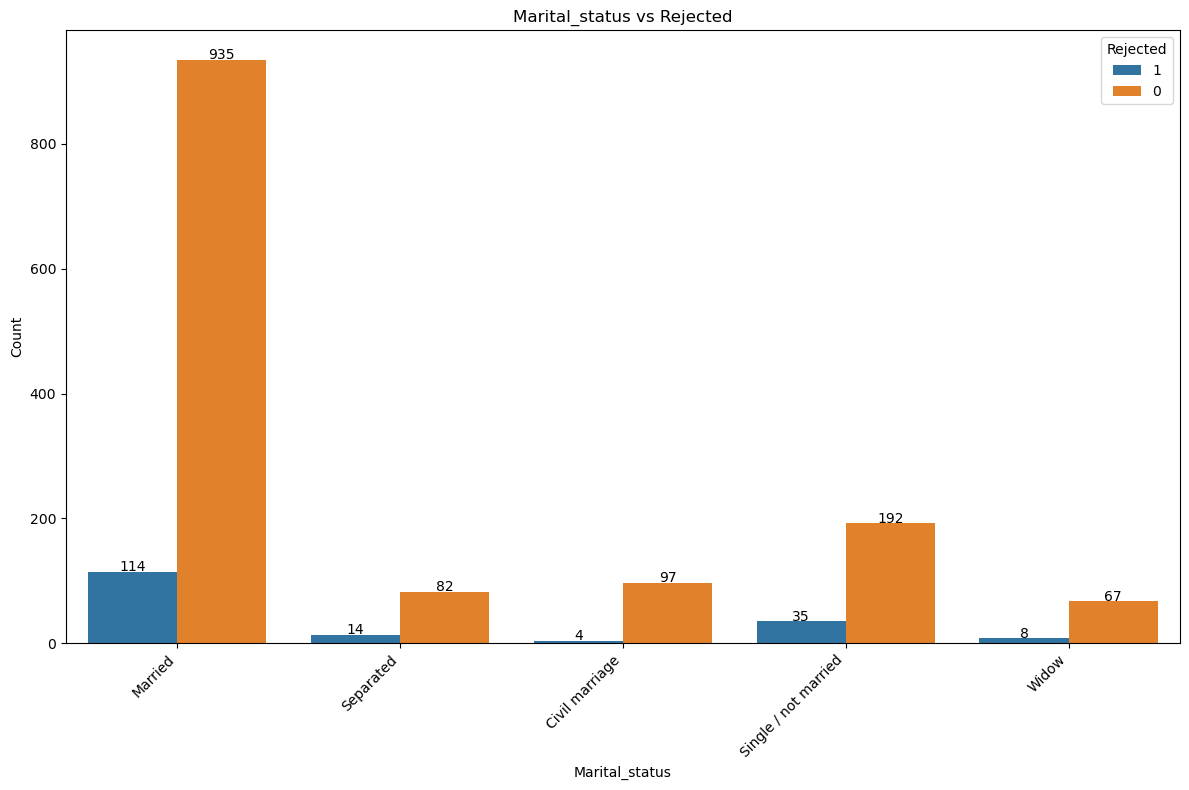

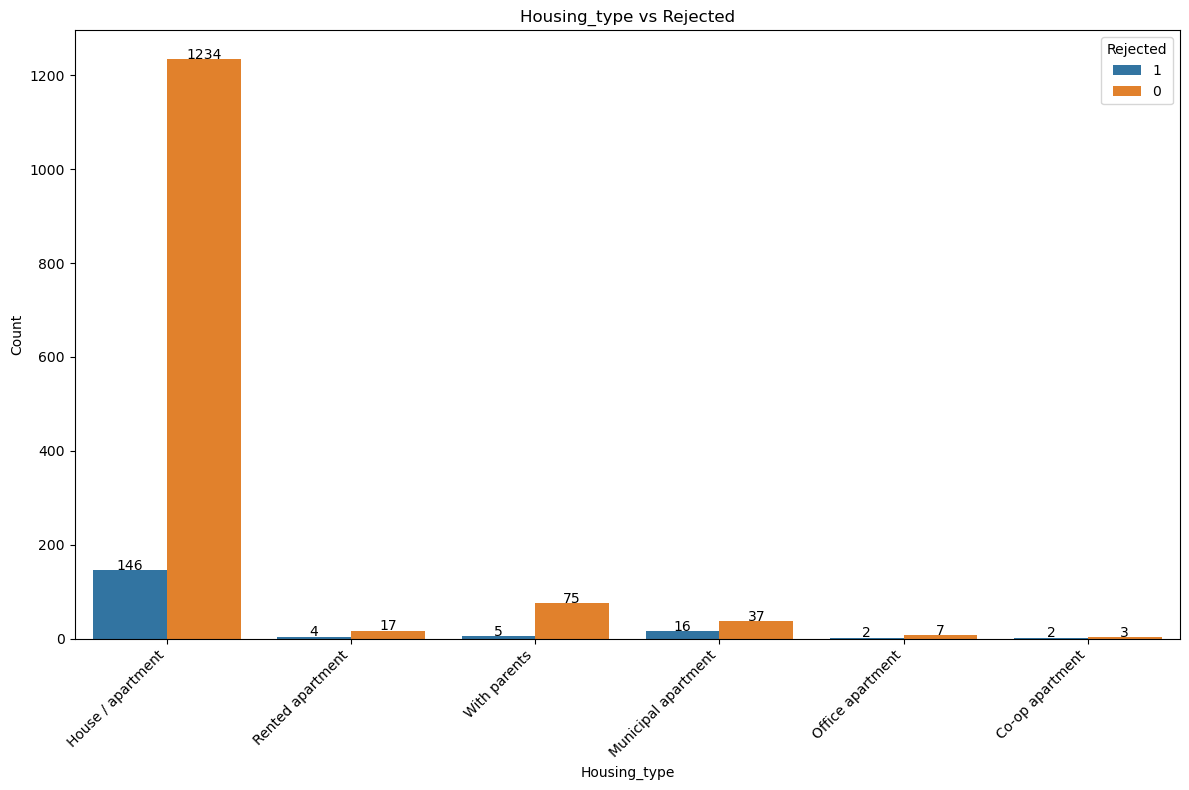

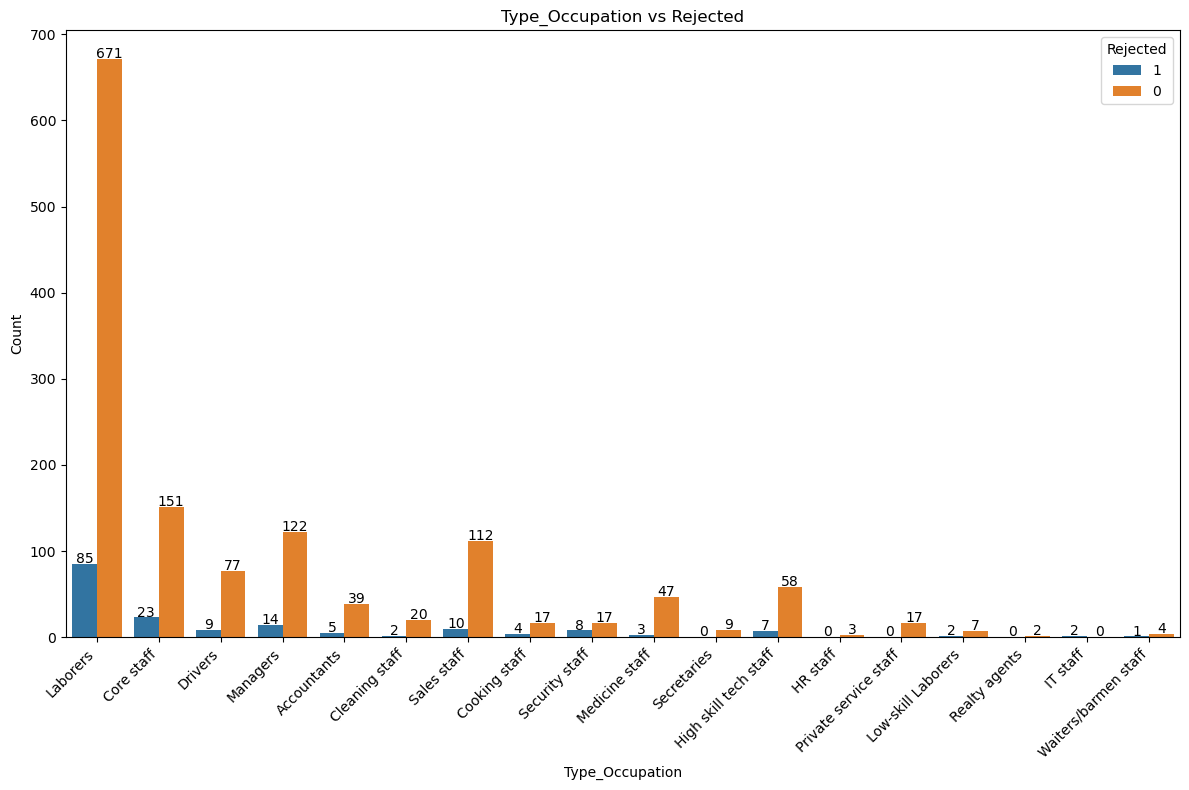

In [155]:
# Check if the Rejected column exists in the dataset
if 'Rejected' in data.columns:
    # Ensure Rejected is treated as a categorical variable
    data['Rejected'] = data['Rejected'].astype(str)
# Iterate over all categorical columns
    for col in categorical_columns:
        plt.figure(figsize=(12, 8))
        # Create a count plot for the current categorical column with Rejected as the hue
        ax = sns.countplot(x=col, hue='Rejected', data=data)
        # Annotate the count plot with the count values
        for p in ax.patches:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1, str(int(p.get_height())), ha='center', fontsize=10)
        plt.title(f"{col} vs Rejected")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Step 15: Feature Selection

In [156]:
import numpy as np

# Step 1: Ensure all features and target variables are numeric
def convert_to_numeric(X):
    X_numeric = []
    for col in X.T:
        try:
            col_numeric = col.astype(float)  # Try converting directly to float
        except ValueError:
            # Manually encode non-numeric data
            unique_values = np.unique(col)  # Find unique values
            encoding_map = {val: idx for idx, val in enumerate(unique_values)}
            col_numeric = np.array([encoding_map[val] for val in col])
        X_numeric.append(col_numeric)
    return np.array(X_numeric).T

# Convert X_train and X_test to numeric
X_train = convert_to_numeric(X_train)
X_test = convert_to_numeric(X_test)

# Step 2: Calculate correlation between features and the target variable
correlations = np.corrcoef(X_train.T, y_train)[-1, :-1]  # Correlations with the target variable

# Step 3: Debug correlation values
print("Correlation values with the target variable:")
for i, corr in enumerate(correlations):
    print(f"Feature {i}: Correlation = {corr:.4f}")

# Step 4: Apply correlation threshold for feature selection
threshold = 0.05  # Lower the threshold for weaker correlations
selected_features = np.where(abs(correlations) > threshold)[0]

# Step 5: Select relevant features
if len(selected_features) > 0:
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    print(f"Selected {len(selected_features)} features out of {X_train.shape[1]}.")
else:
    print("No features met the correlation threshold. Consider lowering the threshold further or using alternative selection methods.")

# Optional: Debug selected features
if len(selected_features) > 0:
    print("Selected feature indices:", selected_features)

Correlation values with the target variable:
Feature 0: Correlation = 0.0104
Feature 1: Correlation = 0.0553
Feature 2: Correlation = -0.0153
Feature 3: Correlation = -0.0071
Feature 4: Correlation = -0.0088
Feature 5: Correlation = 0.0530
Feature 6: Correlation = -0.0500
Feature 7: Correlation = -0.0392
Feature 8: Correlation = 0.0781
Feature 9: Correlation = 0.0027
Feature 10: Correlation = -0.0298
Feature 11: Correlation = 0.0057
Feature 12: Correlation = -0.0025
Feature 13: Correlation = -0.0286
Feature 14: Correlation = -0.0819
Selected 4 features out of 15.
Selected feature indices: [ 1  5  8 14]


# Step 16: Run Regression Models

## A) Binary Logistic Regression

### Define logistic regression

In [157]:
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic Regression Training
def logistic_regression(X, y, lr=0.01, epochs=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    for _ in range(epochs):
        # Linear combination
        linear_model = np.dot(X, weights) + bias
        # Apply sigmoid function
        y_pred = sigmoid(linear_model)

        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

    return weights, bias

# Predict Function
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return (y_pred > 0.5).astype(int)

### Cross-validation setup for Logistic Regression

In [158]:
# Cross-Validation Setup for Binary Logistic Regression
# Perform cross-validation to evaluate logistic regression performance
from numpy import array_split

def cross_validation_logistic(X, y, k=5, lr=0.01, epochs=1000):
    folds = array_split(np.arange(len(X)), k)
    scores = []
    for i in range(k):
        validation_idx = folds[i]
        train_idx = np.setdiff1d(np.arange(len(X)), validation_idx)
        X_train_fold, y_train_fold = X[train_idx], y[train_idx]
        X_val_fold, y_val_fold = X[validation_idx], y[validation_idx]
        weights, bias = logistic_regression(X_train_fold, y_train_fold, lr, epochs)
        y_pred = predict(X_val_fold, weights, bias)
        accuracy = np.mean(y_pred == y_val_fold)
        scores.append(accuracy)
    return np.mean(scores)

cv_score_logistic = cross_validation_logistic(X_train_selected, y_train, k=5)
print(f"Cross-Validation Accuracy for Logistic Regression: {cv_score_logistic:.2f}")

Cross-Validation Accuracy for Logistic Regression: 0.89


### Train Final Logistic Regression Model and Test

In [159]:
# Train and Evaluate Binary Logistic Regression Model
# Train logistic regression on the full training set and test on the test set
weights, bias = logistic_regression(X_train_selected, y_train, lr=0.01, epochs=1000)
y_pred_logistic = predict(X_test_selected, weights, bias)
test_accuracy_logistic = np.mean(y_pred_logistic == y_test)
print(f"Test Accuracy for Logistic Regression: {test_accuracy_logistic:.2f}")

Test Accuracy for Logistic Regression: 0.87


## B) K-Nearest Neighbors (KNN)

### Cross-Validation for KNN

In [160]:
from numpy import array_split
from collections import Counter

# Define the KNN function
def knn(X_train, y_train, X_test, k=3):
    predictions = []
    for x_test in X_test:
        # Compute distances
        distances = [np.sqrt(np.sum((x_train - x_test) ** 2)) for x_train in X_train]
        # Get k nearest neighbors
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return np.array(predictions)

# Cross-validation for KNN
def cross_validation_knn(X, y, k_neighbors=3, k_folds=5):
    folds = array_split(np.arange(len(X)), k_folds)
    scores = []

    for i in range(k_folds):
        validation_idx = folds[i]
        train_idx = np.setdiff1d(np.arange(len(X)), validation_idx)

        # Split into train and validation sets
        X_train_fold, y_train_fold = X[train_idx], y[train_idx]
        X_val_fold, y_val_fold = X[validation_idx], y[validation_idx]

        # Predict using KNN
        y_pred = knn(X_train_fold, y_train_fold, X_val_fold, k=k_neighbors)

        # Calculate accuracy
        accuracy = np.mean(y_pred == y_val_fold)
        scores.append(accuracy)

    return np.mean(scores)

# Compute Cross-Validation Accuracy for KNN
cv_score_knn = cross_validation_knn(X_train_selected, y_train, k_neighbors=3, k_folds=5)
print(f"Cross-Validation Accuracy for KNN: {cv_score_knn:.2f}")

Cross-Validation Accuracy for KNN: 0.86


### Test Accuracy for KNN

In [161]:
# Predict on the test set
y_pred_knn = knn(X_train_selected, y_train, X_test_selected, k=3)

# Calculate test accuracy
test_accuracy_knn = np.mean(y_pred_knn == y_test)
print(f"Test Accuracy for KNN: {test_accuracy_knn:.2f}")

Test Accuracy for KNN: 0.86


## C) Two-Layer Neural Network

### Define Train Neural Network

In [162]:
def train_neural_network(X, y, hidden_size=10, epochs=1000, lr=0.01):
    # Initialize the parameters for the neural network
    def initialize_parameters(input_size, hidden_size, output_size):
        W1 = np.random.randn(hidden_size, input_size) * 0.01
        b1 = np.zeros((hidden_size, 1))
        W2 = np.random.randn(output_size, hidden_size) * 0.01
        b2 = np.zeros((output_size, 1))
        return W1, b1, W2, b2
# Define the ReLU activation function
    def relu(Z):
        return np.maximum(0, Z)
# Derivative of the ReLU function for backpropagation
    def relu_derivative(Z):
        return Z > 0
# Define the Sigmoid activation function
    def sigmoid(Z):
        return 1 / (1 + np.exp(-Z))
# Perform forward propagation through the network
    def forward_propagation(X, W1, b1, W2, b2):
        Z1 = np.dot(W1, X.T) + b1
        A1 = relu(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        return Z1, A1, Z2, A2
# Perform backward propagation to compute gradients
    def backward_propagation(X, y, Z1, A1, Z2, A2, W1, W2):
        m = X.shape[0]
        dZ2 = A2 - y.reshape(1, -1)
        dW2 = (1 / m) * np.dot(dZ2, A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = np.dot(W2.T, dZ2) * relu_derivative(Z1)
        dW1 = (1 / m) * np.dot(dZ1, X)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2

    input_size = X.shape[1]
    output_size = 1
     # Initialize parameters for the network
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
# Training loop for the specified number of epochs
    for _ in range(epochs):
        # Perform forward propagation to compute predictions
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, A2, W1, W2)
        # Update weights and biases using gradient descent
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2
# Return the trained parameters
    return W1, b1, W2, b2

### Define Predict Function

In [163]:
def predict_nn(X, W1, b1, W2, b2):
    # Perform forward propagation through the neural network
    def forward_propagation(X, W1, b1, W2, b2):
        # Define the ReLU activation function
        def relu(Z):
            return np.maximum(0, Z)
# Define the Sigmoid activation function
        def sigmoid(Z):
            return 1 / (1 + np.exp(-Z))
# Compute the linear transformation and activation for the first layer
        Z1 = np.dot(W1, X.T) + b1
        A1 = relu(Z1)
# Compute the linear transformation and activation for the output layer
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)
        return Z1, A1, Z2, A2
# Perform forward propagation to compute predictions
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
# Convert probabilities to binary predictions (1 if probability > 0.5, otherwise 0)
    return (A2 > 0.5).astype(int).flatten()

### Cross-Validation for Neural Network

In [164]:
from numpy import array_split

# Cross-Validation Function for Neural Network
def cross_validation_nn(X, y, hidden_size=10, epochs=1000, lr=0.01, k_folds=5):
    folds = array_split(np.arange(len(X)), k_folds)  # Split data into k folds
    scores = []

    for i in range(k_folds):
        validation_idx = folds[i]
        train_idx = np.setdiff1d(np.arange(len(X)), validation_idx)

        # Split into train and validation sets
        X_train_fold, y_train_fold = X[train_idx], y[train_idx]
        X_val_fold, y_val_fold = X[validation_idx], y[validation_idx]

        # Train the Neural Network on the training fold
        W1, b1, W2, b2 = train_neural_network(X_train_fold, y_train_fold, hidden_size, epochs, lr)

        # Predict on the validation fold
        y_pred = predict_nn(X_val_fold, W1, b1, W2, b2)

        # Calculate accuracy for this fold
        accuracy = np.mean(y_pred == y_val_fold)
        scores.append(accuracy)

    # Return the mean accuracy across all folds
    return np.mean(scores)

cv_score_nn = cross_validation_nn(X_train_selected, y_train, hidden_size=10, epochs=1000, lr=0.01, k_folds=5)
print(f"Cross-Validation Accuracy for Neural Network: {cv_score_nn:.2f}")

Cross-Validation Accuracy for Neural Network: 0.89


### Test Accuracy for Neural Network

In [165]:
# Train the Neural Network on the full training set
W1, b1, W2, b2 = train_neural_network(X_train_selected, y_train, hidden_size=10, epochs=1000, lr=0.01)

# Predict on the test set
y_pred_nn = predict_nn(X_test_selected, W1, b1, W2, b2)

# Calculate test accuracy
test_accuracy_nn = np.mean(y_pred_nn == y_test)
print(f"Neural Network Test Accuracy: {test_accuracy_nn:.2f}")

Neural Network Test Accuracy: 0.87


# Step 17: Graphical Comparison of Regression Models

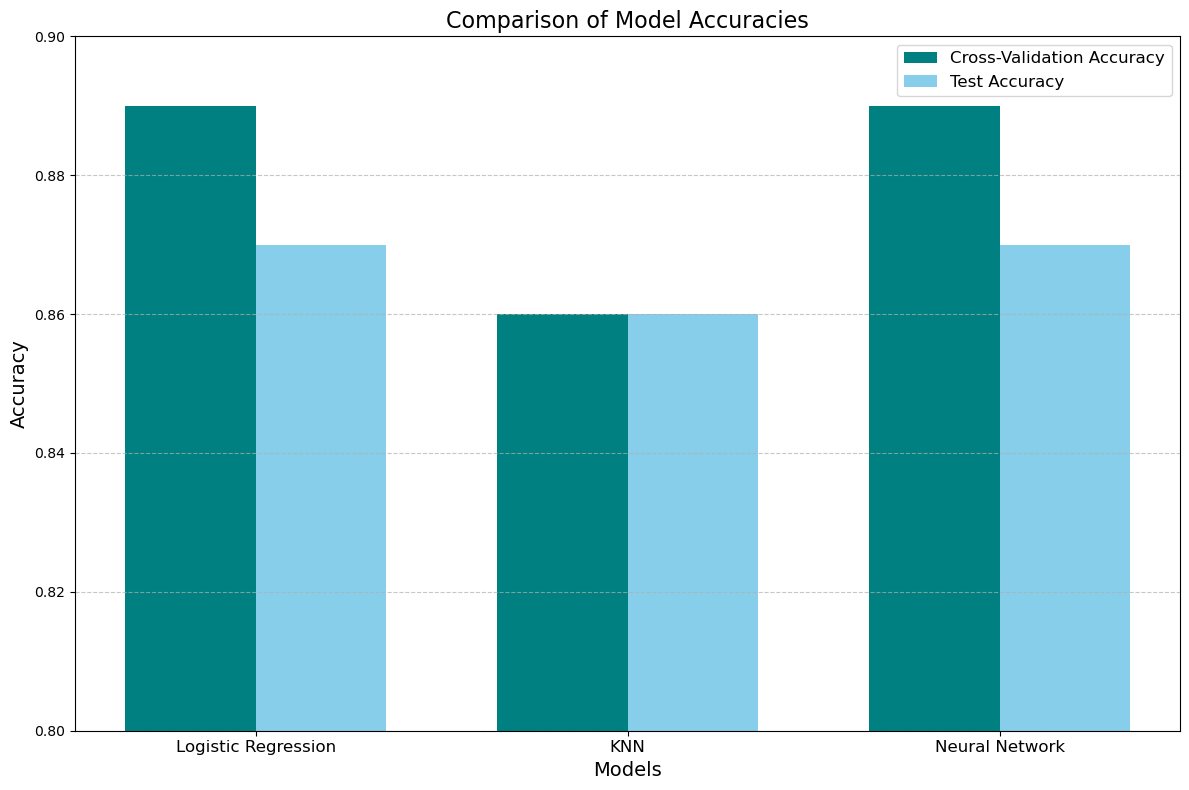

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracies for the models
models = ['Logistic Regression', 'KNN', 'Neural Network']
cv_accuracies = [0.89, 0.86, 0.89]  # Cross-Validation Accuracies
test_accuracies = [0.87, 0.86, 0.87]  # Test Accuracies

# Bar Width
bar_width = 0.35

# X-axis positions
x = np.arange(len(models))

# Set figure size
plt.figure(figsize=(12, 8))

# Plot Cross-Validation Accuracies
plt.bar(x - bar_width/2, cv_accuracies, width=bar_width, label='Cross-Validation Accuracy', color='teal')

# Plot Test Accuracies
plt.bar(x + bar_width/2, test_accuracies, width=bar_width, label='Test Accuracy', color='skyblue')

# Add Labels and Title
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xticks(x, models, fontsize=12)
plt.ylim(0.8, 0.9)  # Set the y-axis range for better visualization
plt.legend(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the Graph
plt.tight_layout()
plt.show()